# 🐟 ViT-FishID: Semi-Supervised Fish Classification

**COMPLETE TRAINING PIPELINE WITH GOOGLE COLAB**

<a href="https://colab.research.google.com/github/cat-thomson/ViT-FishID/blob/main/ViT_FishID_Colab_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🎯 What This Notebook Does

This notebook implements a **complete semi-supervised learning pipeline** for fish species classification using:

**🤖 Vision Transformer (ViT)**: State-of-the-art transformer architecture for image classification
**📊 Semi-Supervised Learning**: Leverages both labeled and unlabeled fish images
**🎓 EMA Teacher-Student Framework**: Uses exponential moving averages for consistency training
**☁️ Google Colab**: Cloud-based training with GPU acceleration

## 📊 Expected Performance

- **Training Time**: 4-6 hours for 100 epochs
- **GPU Requirements**: T4/V100/A100 (Colab Pro recommended)
- **Expected Accuracy**: 80-90% on fish species classification
- **Data Efficiency**: Works well with limited labeled data

## 🛠️ What You Need

1. **Fish Dataset**: Labeled and unlabeled fish images (upload to Google Drive)
2. **Google Colab Pro**: Recommended for longer training sessions
3. **Weights & Biases Account**: Optional for experiment tracking

## 🔧 Step 1: Environment Setup and GPU Check

First, let's verify that we have GPU access and set up the optimal environment for training.

In [1]:
# Check GPU availability and system information
import torch
import os
import gc

print("🔍 SYSTEM INFORMATION")
print("="*50)
print(f"Python version: {os.sys.version}")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    device_name = torch.cuda.get_device_name(0)
    device_memory = torch.cuda.get_device_properties(0).total_memory / 1024**3
    print(f"GPU Device: {device_name}")
    print(f"GPU Memory: {device_memory:.1f} GB")
    print("✅ GPU is ready for training!")

    # Set optimal GPU settings
    torch.backends.cudnn.benchmark = True
    torch.backends.cudnn.deterministic = False

    # Clear GPU cache
    torch.cuda.empty_cache()
    gc.collect()
    print("🚀 GPU optimized for training")

else:
    print("❌ No GPU detected!")
    print("📝 To enable GPU in Colab:")
    print("   Runtime → Change runtime type → Hardware accelerator → GPU")
    print("   Then restart this notebook")

# Set device for later use
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"\n🎯 Using device: {DEVICE}")

🔍 SYSTEM INFORMATION
Python version: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
PyTorch version: 2.8.0+cu126
CUDA available: True
GPU Device: NVIDIA A100-SXM4-40GB
GPU Memory: 39.6 GB
✅ GPU is ready for training!
🚀 GPU optimized for training

🎯 Using device: cuda


## 📁 Step 2: Mount Google Drive

This will give us access to your fish dataset stored in Google Drive.

In [2]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# List contents to verify mount
print("\n📂 Google Drive contents:")
drive_path = '/content/drive/MyDrive'
if os.path.exists(drive_path):
    items = os.listdir(drive_path)[:10]  # Show first 10 items
    for item in items:
        print(f"  - {item}")
    if len(os.listdir(drive_path)) > 10:
        print(f"  ... and {len(os.listdir(drive_path)) - 10} more items")
    print("\n✅ Google Drive mounted successfully!")
else:
    print("❌ Failed to mount Google Drive")

Mounted at /content/drive

📂 Google Drive contents:
  - Mock Matric
  - Photos
  - Admin
  - Uni
  - Fish_Training_Output
  - Colab Notebooks
  - ViT-FishID
  - ViT-FishID_Training_20250814_154652
  - ViT-FishID_Training_20250814_202307
  - ViT-FishID_Training_20250814_205442
  ... and 7 more items

✅ Google Drive mounted successfully!


## 📦 Step 3: Install Dependencies

Install all required packages for ViT training and semi-supervised learning.

In [3]:
# Install required packages
print("📦 Installing required packages...")

!pip install -q timm
!pip install -q wandb
!pip install -q matplotlib seaborn
!pip install -q scikit-learn
!pip install -q tqdm
!pip install -q Pillow

print("✅ All packages installed successfully!")

# Verify installations
try:
    import timm
    import wandb
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import accuracy_score
    from tqdm import tqdm
    from PIL import Image
    print("🔍 All imports successful!")
except ImportError as e:
    print(f"❌ Import error: {e}")

📦 Installing required packages...
✅ All packages installed successfully!
🔍 All imports successful!


## 🔄 Step 4: Clone ViT-FishID Repository

Clone the repository to get all necessary training scripts and model definitions.

In [4]:
import os

# Clone repository if not already present
repo_dir = '/content/ViT-FishID'

if not os.path.exists(repo_dir):
    print("📥 Cloning ViT-FishID repository...")
    !git clone https://github.com/cat-thomson/ViT-FishID.git /content/ViT-FishID
    print("✅ Repository cloned successfully!")
else:
    print("✅ Repository already exists")

# Change to repository directory
os.chdir(repo_dir)
print(f"📁 Current directory: {os.getcwd()}")

# List repository contents
print("\n📂 Repository contents:")
for item in sorted(os.listdir('.')):
    if os.path.isfile(item):
        print(f"  📄 {item}")
    else:
        print(f"  📁 {item}/")

📥 Cloning ViT-FishID repository...
Cloning into '/content/ViT-FishID'...
remote: Enumerating objects: 193, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 193 (delta 86), reused 144 (delta 45), pack-reused 0 (from 0)
Receiving objects: 100% (193/193), 651.20 KiB | 5.87 MiB/s, done.
Resolving deltas: 100% (86/86), done.
✅ Repository cloned successfully!
📁 Current directory: /content/ViT-FishID

📂 Repository contents:
  📁 .git/
  📄 .gitattributes
  📄 .gitignore
  📄 EXTENDED_TRAINING_SETUP.md
  📄 MAE_INTEGRATION_GUIDE.md
  📄 README.md
  📄 TRAINING_FIXES_APPLIED.md
  📄 Untitled-1.ipynb
  📄 Untitled-2.ipynb
  📄 ViT_FishID_Colab_Training.ipynb
  📄 ViT_FishID_Colab_Training_Reordered.ipynb
  📄 ViT_FishID_MAE_EMA_Training.ipynb
  📄 ViT_FishID_Supervised_Training.ipynb
  📄 data.py
  📄 evaluate.py
  📁 fish_cutouts/
  📁 local_checkpoints/
  📄 local_resume_training.py
  📄 model.py
  📄 pipeline.py
  📄 requirements.txt
  📄 resume

## 🐠 Step 5: Setup Fish Dataset

**Important**: Upload your `fish_cutouts.zip` file to Google Drive before running this step.

This step will locate and extract your fish dataset for training.

In [5]:
import os
import zipfile
import json
from pathlib import Path

print("🐠 FISH DATASET SETUP")
print("="*50)

# Search for fish_cutouts.zip in Google Drive
drive_path = '/content/drive/MyDrive'
zip_locations = []

print("🔍 Searching for fish_cutouts.zip...")
for root, dirs, files in os.walk(drive_path):
    for file in files:
        if 'fish_cutouts.zip' in file.lower():
            zip_locations.append(os.path.join(root, file))

if not zip_locations:
    print("❌ fish_cutouts.zip not found in Google Drive!")
    print("📝 Please upload fish_cutouts.zip to Google Drive and try again")
    raise FileNotFoundError("fish_cutouts.zip not found")

# Use the first found zip file
zip_path = zip_locations[0]
print(f"✅ Found dataset: {zip_path}")

# Extract dataset
extract_path = '/content/fish_cutouts'
if not os.path.exists(extract_path):
    print(f"📂 Extracting to: {extract_path}")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall('/content')
    print("✅ Dataset extracted successfully!")
else:
    print("✅ Dataset already extracted")

# Verify dataset structure
labeled_path = os.path.join(extract_path, 'labeled')
unlabeled_path = os.path.join(extract_path, 'unlabeled')

if os.path.exists(labeled_path):
    labeled_species = os.listdir(labeled_path)
    total_labeled = sum(len(os.listdir(os.path.join(labeled_path, species)))
                       for species in labeled_species if os.path.isdir(os.path.join(labeled_path, species)))
    print(f"📊 Labeled data: {len(labeled_species)} species, {total_labeled} images")
else:
    print("❌ Labeled folder not found!")

if os.path.exists(unlabeled_path):
    unlabeled_images = len([f for f in os.listdir(unlabeled_path)
                           if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
    print(f"📊 Unlabeled data: {unlabeled_images} images")
else:
    print("⚠️ Unlabeled folder not found (optional for supervised training)")

# Save dataset info for later use
dataset_info = {
    'labeled_path': labeled_path,
    'unlabeled_path': unlabeled_path if os.path.exists(unlabeled_path) else None,
    'num_species': len(labeled_species) if os.path.exists(labeled_path) else 0,
    'labeled_images': total_labeled if os.path.exists(labeled_path) else 0,
    'unlabeled_images': unlabeled_images if os.path.exists(unlabeled_path) else 0
}

with open('dataset_info.json', 'w') as f:
    json.dump(dataset_info, f, indent=2)

print(f"\n✅ Dataset setup complete!")
print(f"📁 Labeled path: {labeled_path}")
print(f"📁 Unlabeled path: {unlabeled_path}")

🐠 FISH DATASET SETUP
🔍 Searching for fish_cutouts.zip...
✅ Found dataset: /content/drive/MyDrive/fish_cutouts.zip
📂 Extracting to: /content/fish_cutouts
✅ Dataset extracted successfully!
📊 Labeled data: 34 species, 5137 images
📊 Unlabeled data: 24015 images

✅ Dataset setup complete!
📁 Labeled path: /content/fish_cutouts/labeled
📁 Unlabeled path: /content/fish_cutouts/unlabeled


## 📈 Step 6: Setup Weights & Biases (Optional)

Setup experiment tracking with Weights & Biases. Skip this cell if you don't want to use W&B.

In [6]:
# Setup Weights & Biases (optional)
import wandb

print("📈 Setting up Weights & Biases...")

try:
    # Login to wandb (you'll need to paste your API key)
    wandb.login()

    # Initialize project
    wandb.init(
        project="vit-fish-classification",
        name="colab-training-run",
        config={
            "model": "vit_base_patch16_224",
            "framework": "semi-supervised",
            "environment": "google-colab"
        }
    )

    print("✅ W&B setup complete!")
    USE_WANDB = True

except Exception as e:
    print(f"⚠️ W&B setup failed: {e}")
    print("📝 Training will continue without experiment tracking")
    USE_WANDB = False

📈 Setting up Weights & Biases...


/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: cativthomson (cativthomson-university-of-cape-town) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


✅ W&B setup complete!


## ⚙️ Step 7: Configure Training Parameters

Set up all training configurations and hyperparameters.

In [7]:
# Training Configuration
import json

print("⚙️ TRAINING CONFIGURATION")
print("="*50)

# Load dataset info
with open('dataset_info.json', 'r') as f:
    dataset_info = json.load(f)

TRAINING_CONFIG = {
    # Model settings
    'model_name': 'vit_base_patch16_224',
    'num_classes': dataset_info['num_species'],
    'image_size': 224,

    # Training settings
    'epochs': 100,
    'batch_size': 32,
    'learning_rate': 1e-4,
    'weight_decay': 1e-4,

    # Semi-supervised settings
    'ema_decay': 0.999,
    'consistency_weight': 1.0,
    'confidence_threshold': 0.95,

    # Data settings
    'labeled_batch_size': 16,
    'unlabeled_batch_size': 16,
    'num_workers': 2,

    # Paths
    'labeled_data_path': dataset_info['labeled_path'],
    'unlabeled_data_path': dataset_info['unlabeled_path'],
    'checkpoint_dir': 'checkpoints',

    # Other settings
    'save_every': 10,
    'eval_every': 5,
    'device': str(DEVICE),
    'use_wandb': USE_WANDB if 'USE_WANDB' in globals() else False
}

# Create checkpoint directory
os.makedirs(TRAINING_CONFIG['checkpoint_dir'], exist_ok=True)

# Print configuration
print("📋 Training Configuration:")
for key, value in TRAINING_CONFIG.items():
    print(f"  {key}: {value}")

# Save configuration
with open('training_config.json', 'w') as f:
    json.dump(TRAINING_CONFIG, f, indent=2)

print("\n✅ Configuration saved!")

⚙️ TRAINING CONFIGURATION
📋 Training Configuration:
  model_name: vit_base_patch16_224
  num_classes: 34
  image_size: 224
  epochs: 100
  batch_size: 32
  learning_rate: 0.0001
  weight_decay: 0.0001
  ema_decay: 0.999
  consistency_weight: 1.0
  confidence_threshold: 0.95
  labeled_batch_size: 16
  unlabeled_batch_size: 16
  num_workers: 2
  labeled_data_path: /content/fish_cutouts/labeled
  unlabeled_data_path: /content/fish_cutouts/unlabeled
  checkpoint_dir: checkpoints
  save_every: 10
  eval_every: 5
  device: cuda
  use_wandb: True

✅ Configuration saved!


## 🤖 Step 8: Load MAE Pre-trained Model (Optional)

**This step loads your pre-trained MAE model to initialize the ViT encoder with better features.**

Skip this cell if you don't have a MAE pre-trained model or want to train from scratch.

In [8]:
# Load MAE pre-trained model (optional)
import torch
import glob

print("🤖 MAE PRE-TRAINED MODEL LOADING")
print("="*50)

# Search for MAE checkpoints
mae_patterns = [
    '/content/drive/MyDrive/ViT-FishID/mae_base_checkpoints/mae_final_model.pth',
]

mae_checkpoints = []
for pattern in mae_patterns:
    mae_checkpoints.extend(glob.glob(pattern, recursive=True))

if mae_checkpoints:
    # Use the first found MAE checkpoint
    mae_path = mae_checkpoints[0]
    print(f"✅ Found MAE model: {mae_path}")

    try:
        # Load MAE checkpoint with weights_only=False for compatibility
        # Note: Only use weights_only=False if you trust the checkpoint source
        print("🔧 Loading checkpoint with legacy compatibility mode...")
        mae_checkpoint = torch.load(mae_path, map_location='cpu', weights_only=False)

        # Debug: Print checkpoint structure
        print("🔍 Checkpoint structure:")
        if isinstance(mae_checkpoint, dict):
            print(f"   Checkpoint keys: {list(mae_checkpoint.keys())}")
        else:
            print(f"   Checkpoint type: {type(mae_checkpoint)}")

        # Extract model state dict from checkpoint
        model_state_dict = None
        if 'model_state_dict' in mae_checkpoint:
            model_state_dict = mae_checkpoint['model_state_dict']
            print("✅ Found 'model_state_dict' key in checkpoint")
        elif 'model' in mae_checkpoint:
            model_state_dict = mae_checkpoint['model']
            print("✅ Found 'model' key in checkpoint")
        elif 'state_dict' in mae_checkpoint:
            model_state_dict = mae_checkpoint['state_dict']
            print("✅ Found 'state_dict' key in checkpoint")
        else:
            # Check if the entire checkpoint is the state dict
            # Look for typical model weight keys (should contain tensors, not scalars)
            tensor_keys = [k for k, v in mae_checkpoint.items() if isinstance(v, torch.Tensor) and v.dim() > 0]
            if tensor_keys:
                model_state_dict = mae_checkpoint
                print("✅ Using entire checkpoint as state_dict")
            else:
                print("❌ No model weights found in checkpoint")
                model_state_dict = None

        if model_state_dict is not None:
            print(f"🔍 Model state dict has {len(model_state_dict)} keys")

            # Show sample keys to understand structure
            sample_keys = list(model_state_dict.keys())[:10]
            print(f"📋 Sample model keys: {sample_keys}")

            # Filter encoder weights for ViT
            mae_encoder_weights = {}
            encoder_count = 0

            for key, value in model_state_dict.items():
                # Skip non-tensor values
                if not isinstance(value, torch.Tensor):
                    continue

                new_key = None

                # Handle different MAE checkpoint formats
                if key.startswith('encoder.'):
                    # Standard MAE format: encoder.xxx -> backbone.xxx
                    new_key = key.replace('encoder.', 'backbone.')
                    encoder_count += 1
                elif key.startswith('backbone.'):
                    # Already has backbone prefix
                    new_key = key
                    encoder_count += 1
                elif key.startswith(('patch_embed', 'pos_embed', 'cls_token', 'blocks')):
                    # Direct ViT encoder components
                    new_key = f'backbone.{key}'
                    encoder_count += 1
                elif not key.startswith(('decoder', 'mask_token', 'loss', 'optimizer', 'scheduler', 'epoch')):
                    # Include other potential encoder weights, exclude decoder/metadata
                    if 'embed' in key or 'block' in key or 'norm' in key or 'head' in key:
                        new_key = f'backbone.{key}'
                        encoder_count += 1

                if new_key is not None:
                    mae_encoder_weights[new_key] = value

            if encoder_count > 0:
                print(f"✅ Successfully extracted {len(mae_encoder_weights)} encoder weights from MAE")
                print(f"🎯 Encoder weights found: {encoder_count} parameters")

                # Show actual weight key samples (not metadata)
                actual_weight_keys = [k for k in mae_encoder_weights.keys() if isinstance(mae_encoder_weights[k], torch.Tensor)][:5]
                print(f"🔍 Sample weight parameter keys: {actual_weight_keys}")

                # Verify we have actual model weights, not just metadata
                total_params = sum(v.numel() for v in mae_encoder_weights.values() if isinstance(v, torch.Tensor))
                print(f"📊 Total parameters loaded: {total_params:,}")

                if total_params > 1000:  # Reasonable check - should have many parameters
                    TRAINING_CONFIG['mae_pretrained_weights'] = mae_encoder_weights
                    TRAINING_CONFIG['use_mae_init'] = True
                else:
                    print("⚠️ Very few parameters found - might be loading metadata instead of weights")
                    TRAINING_CONFIG['use_mae_init'] = False
            else:
                print("⚠️ No encoder weights found in MAE checkpoint")
                TRAINING_CONFIG['use_mae_init'] = False
        else:
            print("❌ Could not extract model state dict from checkpoint")
            TRAINING_CONFIG['use_mae_init'] = False

    except Exception as e:
        print(f"❌ Failed to load MAE model: {e}")
        print("💡 Trying alternative loading methods...")

        try:
            # Fallback: Try to load and inspect structure more carefully
            mae_checkpoint = torch.load(mae_path, map_location='cpu', weights_only=False)

            # More detailed inspection
            def find_model_weights(obj, path=""):
                """Recursively find model weights in checkpoint"""
                if isinstance(obj, torch.Tensor) and obj.dim() > 0:
                    return {path: obj}
                elif isinstance(obj, dict):
                    weights = {}
                    for k, v in obj.items():
                        sub_weights = find_model_weights(v, f"{path}.{k}" if path else k)
                        weights.update(sub_weights)
                    return weights
                else:
                    return {}

            all_weights = find_model_weights(mae_checkpoint)
            encoder_weights = {k: v for k, v in all_weights.items()
                             if not any(exclude in k for exclude in ['decoder', 'mask_token', 'loss', 'optimizer', 'scheduler'])}

            if encoder_weights:
                # Convert keys to backbone format
                mae_encoder_weights = {}
                for k, v in encoder_weights.items():
                    if k.startswith('encoder.'):
                        new_key = k.replace('encoder.', 'backbone.')
                    elif not k.startswith('backbone.'):
                        new_key = f'backbone.{k}'
                    else:
                        new_key = k
                    mae_encoder_weights[new_key] = v

                total_params = sum(v.numel() for v in mae_encoder_weights.values())
                print(f"✅ Fallback method found {len(mae_encoder_weights)} weights ({total_params:,} parameters)")

                TRAINING_CONFIG['mae_pretrained_weights'] = mae_encoder_weights
                TRAINING_CONFIG['use_mae_init'] = True
            else:
                print("❌ No suitable weights found with fallback method")
                TRAINING_CONFIG['use_mae_init'] = False

        except Exception as e2:
            print(f"❌ All loading methods failed: {e2}")
            TRAINING_CONFIG['use_mae_init'] = False
else:
    print("⚠️ No MAE pre-trained model found")
    print("📝 Training will use standard ImageNet initialization")
    TRAINING_CONFIG['use_mae_init'] = False

print(f"\n✅ MAE initialization: {'Enabled' if TRAINING_CONFIG.get('use_mae_init', False) else 'Disabled'}")

# Print additional info if MAE is enabled
if TRAINING_CONFIG.get('use_mae_init', False):
    mae_weights = TRAINING_CONFIG.get('mae_pretrained_weights', {})
    if isinstance(mae_weights, dict):
        # Count actual tensor parameters
        tensor_count = len([k for k, v in mae_weights.items() if isinstance(v, torch.Tensor)])
        total_params = sum(v.numel() for v in mae_weights.values() if isinstance(v, torch.Tensor))

        print(f"📊 MAE weights loaded: {tensor_count} weight tensors")
        print(f"🔢 Total parameters: {total_params:,}")

        # Show actual weight parameter keys (not metadata)
        weight_keys = [k for k, v in mae_weights.items() if isinstance(v, torch.Tensor)][:5]
        print(f"🔍 Sample weight keys: {weight_keys}")

    print("🚀 ViT encoder will be initialized with MAE pre-trained weights!")
else:
    print("📝 ViT will use standard ImageNet pre-trained initialization")

🤖 MAE PRE-TRAINED MODEL LOADING
✅ Found MAE model: /content/drive/MyDrive/ViT-FishID/mae_base_checkpoints/mae_final_model.pth
🔧 Loading checkpoint with legacy compatibility mode...
🔍 Checkpoint structure:
   Checkpoint keys: ['epoch', 'model_state_dict', 'optimizer_state_dict', 'scheduler_state_dict', 'loss', 'config', 'timestamp', 'training_losses', 'epoch_times']
✅ Found 'model_state_dict' key in checkpoint
🔍 Model state dict has 254 keys
📋 Sample model keys: ['encoder.cls_token', 'encoder.pos_embed', 'encoder.patch_embed.proj.weight', 'encoder.patch_embed.proj.bias', 'encoder.blocks.0.norm1.weight', 'encoder.blocks.0.norm1.bias', 'encoder.blocks.0.attn.qkv.weight', 'encoder.blocks.0.attn.qkv.bias', 'encoder.blocks.0.attn.proj.weight', 'encoder.blocks.0.attn.proj.bias']
✅ Successfully extracted 150 encoder weights from MAE
🎯 Encoder weights found: 150 parameters
🔍 Sample weight parameter keys: ['backbone.cls_token', 'backbone.pos_embed', 'backbone.patch_embed.proj.weight', 'backbone.

## 🚀 Step 9: Start Semi-Supervised Training

Begin the main training loop with semi-supervised learning and EMA teacher-student framework.

In [15]:
# 🚀 OPTION 2: A100 GPU OPTIMIZED TRAINING (Full MAE + Semi-Supervised)
import subprocess
import sys
import os
import time
import torch

print("🚀 A100 GPU OPTIMIZED TRAINING")
print("="*60)

# Check if we have A100 or high-memory GPU
print("🔍 GPU Check:")
if torch.cuda.is_available():
    gpu_name = torch.cuda.get_device_name(0)
    gpu_memory = torch.cuda.get_device_properties(0).total_memory / 1024**3
    print(f"   GPU: {gpu_name}")
    print(f"   Memory: {gpu_memory:.1f}GB")

    if "A100" in gpu_name or gpu_memory > 20:
        print("✅ High-performance GPU detected - optimal for full training!")
        use_full_config = True
    else:
        print("⚠️ Standard GPU detected - consider upgrading for better performance")
        use_full_config = False
else:
    print("❌ No GPU detected")
    use_full_config = False

if use_full_config:
    print("\n🔥 FULL CONFIGURATION ENABLED:")
    print("✅ MAE pretraining: ENABLED")
    print("✅ Semi-supervised mode: ENABLED")
    print("✅ Batch size: 32 (full size)")
    print("✅ Mixed precision: AUTO (handled by PyTorch)")
    print("✅ All optimizations: ENABLED")

    # Get data path
    configured_labeled_path = TRAINING_CONFIG['labeled_data_path']
    parent_data_dir = os.path.dirname(configured_labeled_path)
    correct_data_path = parent_data_dir

    # A100 optimized training args (removed --mixed_precision)
    training_args_a100 = [
        sys.executable, 'train.py',
        '--data_dir', correct_data_path,
        '--epochs', '100',
        '--batch_size', '32',  # Full batch size
        '--learning_rate', '0.0001',
        '--save_dir', 'checkpoints',
        '--device', 'cuda',
        '--mode', 'semi_supervised',  # Full semi-supervised
        '--pretrained',  # MAE pretraining
        '--val_split', '0.2',
        '--test_split', '0.2',
        '--seed', '42',
        '--warmup_epochs', '10',
        '--save_frequency', '10'
        # Removed --mixed_precision as it's not supported by the script
    ]

    print(f"\n📝 A100 Command: {' '.join(training_args_a100)}")

    try:
        print("\n🚀 STARTING A100 OPTIMIZED TRAINING...")
        print("Expected startup time: 3-5 minutes")
        print("Expected first epoch: 8-12 minutes")
        print("Expected total time: 3-4 hours")
        print("-" * 50)

        # Execute training with real-time monitoring
        process = subprocess.Popen(training_args_a100, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True, bufsize=1)

        start_time = time.time()
        line_count = 0

        while True:
            output = process.stdout.readline()
            if output == '' and process.poll() is not None:
                break
            if output:
                print(output.strip())
                line_count += 1

                # Show progress indicators
                if 'Epoch' in output:
                    elapsed = (time.time() - start_time) / 60
                    print(f"⏰ Time elapsed: {elapsed:.1f} minutes")

        rc = process.poll()
        if rc == 0:
            print(f"\n🎉 A100 TRAINING COMPLETED SUCCESSFULLY!")
            total_time = (time.time() - start_time) / 60
            print(f"⏰ Total time: {total_time:.1f} minutes")
        else:
            print(f"\n❌ Training failed with exit code: {rc}")

    except Exception as e:
        print(f"❌ A100 training error: {e}")

else:
    print(f"\n💡 TO USE THIS OPTION:")
    print("1. Go to Runtime → Change runtime type")
    print("2. Hardware accelerator: GPU")
    print("3. GPU type: A100 (if available)")
    print("4. Then restart this notebook and run this cell")
    print("5. A100 will handle the full workload easily!")

    print(f"\n🔧 OR TRY SMALLER CONFIG ON CURRENT GPU:")
    print("Run the previous cell (Option 1) for a working solution")

print(f"\n✅ Run this cell ONLY if you have A100 or similar high-memory GPU!")
print("Otherwise, use Option 1 (Fast Training) from the previous cell.")

Streaming output truncated to the last 5000 lines.
⏰ Time elapsed: 147.6 minutes
Epoch 96:  90%|█████████ | 260/288 [01:15<00:08,  3.49it/s, Total=0.0640, Sup=0.0637, Cons=0.0002, L-Acc=97.9%, P-Acc=99.9%]
⏰ Time elapsed: 147.6 minutes
Epoch 96:  91%|█████████ | 261/288 [01:15<00:07,  3.49it/s, Total=0.0640, Sup=0.0637, Cons=0.0002, L-Acc=97.9%, P-Acc=99.9%]
⏰ Time elapsed: 147.6 minutes
Epoch 96:  91%|█████████ | 261/288 [01:15<00:07,  3.49it/s, Total=0.0638, Sup=0.0635, Cons=0.0002, L-Acc=97.9%, P-Acc=99.9%]
⏰ Time elapsed: 147.6 minutes
Epoch 96:  91%|█████████ | 262/288 [01:15<00:07,  3.49it/s, Total=0.0638, Sup=0.0635, Cons=0.0002, L-Acc=97.9%, P-Acc=99.9%]
⏰ Time elapsed: 147.7 minutes
Epoch 96:  91%|█████████ | 262/288 [01:15<00:07,  3.49it/s, Total=0.0637, Sup=0.0634, Cons=0.0002, L-Acc=97.9%, P-Acc=99.9%]
⏰ Time elapsed: 147.7 minutes
Epoch 96:  91%|█████████▏| 263/288 [01:15<00:07,  3.49it/s, Total=0.0637, Sup=0.0634, Cons=0.0002, L-Acc=97.9%, P-Acc=99.9%]
⏰ Time elapsed: 147

In [16]:
# 💾 SAVE TEST SPLIT FOR POST-SESSION EVALUATION
import json
import os
import pickle
from sklearn.model_selection import train_test_split
import numpy as np

print("💾 SAVING TEST SPLIT FOR POST-SESSION EVALUATION")
print("="*60)

# This ensures you can evaluate on the EXACT same test data later
# even after Colab session times out

try:
    # Get the data directory
    data_dir = '/content/fish_cutouts'  # Your fish dataset location

    # Recreate the exact same split using the same parameters as training
    print("🔄 Recreating train/val/test split with same parameters...")

    # Collect all image paths and labels (same logic as in training)
    image_paths = []
    labels = []
    class_names = []

    labeled_dir = os.path.join(data_dir, 'labeled')

    if os.path.exists(labeled_dir):
        # Correctly populate class_names by sorting the directory list
        class_names = sorted([d for d in os.listdir(labeled_dir) if os.path.isdir(os.path.join(labeled_dir, d)) and not d.startswith('.')])

        # Populate image_paths and labels using the sorted class_names
        for class_idx, class_name in enumerate(class_names):
            class_path = os.path.join(labeled_dir, class_name)
            if os.path.isdir(class_path):
                for img_file in os.listdir(class_path):
                    if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                        image_paths.append(os.path.join(class_path, img_file))
                        labels.append(class_idx)

    print(f"📊 Found {len(image_paths)} images across {len(class_names)} classes")

    # Use the EXACT same split parameters as training
    SEED = 42  # Same seed as training
    VAL_SPLIT = 0.2  # Same as training
    TEST_SPLIT = 0.2  # Same as training

    # Recreate the exact same split
    np.random.seed(SEED)

    # First split: train+val vs test
    # Ensure stratification is used if you have multiple classes
    if len(class_names) > 1 and len(set(labels)) > 1:
        train_val_paths, test_paths, train_val_labels, test_labels = train_test_split(
            image_paths, labels,
            test_size=TEST_SPLIT,
            random_state=SEED,
            stratify=labels
        )

        # Second split: train vs val
        train_paths, val_paths, train_labels, val_labels = train_test_split(
            train_val_paths, train_val_labels,
            test_size=VAL_SPLIT/(1-TEST_SPLIT),  # Adjust for remaining data
            random_state=SEED,
            stratify=train_val_labels
        )
    else:
         # Handle case with only one class or no data (though previous checks should catch no data)
        print("⚠️ Only one class or no data found. Skipping stratification.")
        train_val_paths, test_paths, train_val_labels, test_labels = train_test_split(
            image_paths, labels,
            test_size=TEST_SPLIT,
            random_state=SEED
        )
        train_paths, val_paths, train_labels, val_labels = train_test_split(
            train_val_paths, train_val_labels,
            test_size=VAL_SPLIT/(1-TEST_SPLIT),
            random_state=SEED
        )


    print(f"✅ Split recreated:")
    print(f"   Train: {len(train_paths)} samples")
    print(f"   Val: {len(val_paths)} samples")
    print(f"   Test: {len(test_paths)} samples")

    # Save test split information
    test_split_data = {
        'test_image_paths': test_paths,
        'test_labels': test_labels,
        'class_names': class_names, # Ensure class_names is correctly populated here
        'data_dir': data_dir,
        'seed': SEED,
        'val_split': VAL_SPLIT,
        'test_split': TEST_SPLIT,
        'total_classes': len(class_names),
        'test_samples': len(test_paths),
        'split_timestamp': '2025-08-19_21:37:58'  # When training started (or update if needed)
    }

    # Save to multiple formats for reliability

    # 1. Save as JSON (human readable)
    with open('/content/test_split_info.json', 'w') as f:
        json.dump(test_split_data, f, indent=2)
    print("✅ Test split saved to: /content/test_split_info.json")

    # 2. Save as pickle (exact Python objects)
    with open('/content/test_split_data.pkl', 'wb') as f:
        pickle.dump(test_split_data, f)
    print("✅ Test split saved to: /content/test_split_data.pkl")

    # 3. Save to Google Drive (persistent storage)
    drive_save_path = '/content/drive/MyDrive/ViT_FishID_test_split.json'
    try:
        with open(drive_save_path, 'w') as f:
            json.dump(test_split_data, f, indent=2)
        print(f"✅ Test split backed up to Google Drive: {drive_save_path}")
    except Exception as e:
        print(f"⚠️ Could not save to Google Drive: {e}")

    # 4. Create a simple test list file
    test_list_path = '/content/test_image_list.txt'
    with open(test_list_path, 'w') as f:
        # Safely get class name using a check
        for path, label in zip(test_paths, test_labels):
            class_name = class_names[label] if 0 <= label < len(class_names) else f"UnknownClass_{label}"
            f.write(f"{path}\t{label}\t{class_name}\n")
    print(f"✅ Test image list saved to: {test_list_path}")

    print(f"\n🎯 POST-SESSION EVALUATION INSTRUCTIONS:")
    print("="*50)
    print("When your session times out, you can still evaluate by:")
    print("1. 📂 Download your trained checkpoint from 'checkpoints/' folder")
    print("2. 💾 Download the test split files created above")
    print("3. 🔄 Start a new Colab session")
    print("4. 📤 Upload the checkpoint and test split files")
    print("5. 🧪 Run evaluation using the saved test split")

    print(f"\n📋 Test Split Summary:")
    print(f"   Random seed: {SEED}")
    print(f"   Test samples: {len(test_paths)}")
    print(f"   Classes: {len(class_names)}")
    print(f"   Split ratios: Train=60%, Val=20%, Test=20%")

    # Show sample test images for verification
    print(f"\n🔍 Sample test images (first 5):")
    for i in range(min(5, len(test_paths))):
        # Safely get class name for printing sample
        class_name = class_names[test_labels[i]] if 0 <= test_labels[i] < len(class_names) else f"UnknownClass_{test_labels[i]}"
        print(f"   {test_paths[i]} -> {class_name}")


except Exception as e:
    print(f"❌ Error saving test split: {e}")
    print("💡 Make sure the fish dataset is properly loaded and has multiple classes if using stratification.")

print(f"\n✅ Test split preservation complete!")
print("Now your training can continue, and you can evaluate later even after timeout!")

💾 SAVING TEST SPLIT FOR POST-SESSION EVALUATION
🔄 Recreating train/val/test split with same parameters...
📊 Found 5137 images across 33 classes
✅ Split recreated:
   Train: 3081 samples
   Val: 1028 samples
   Test: 1028 samples
✅ Test split saved to: /content/test_split_info.json
✅ Test split saved to: /content/test_split_data.pkl
✅ Test split backed up to Google Drive: /content/drive/MyDrive/ViT_FishID_test_split.json
❌ Error saving test split: list index out of range
💡 Make sure the fish dataset is properly loaded

✅ Test split preservation complete!
Now your training can continue, and you can evaluate later even after timeout!


## 🔄 Step 10: Resume Training (If Interrupted)

Use this cell to resume training from the latest checkpoint if your session was interrupted.

In [10]:
# Resume training from checkpoint
import glob
import subprocess
import sys

print("🔄 RESUME TRAINING FROM CHECKPOINT")
print("="*50)

# Find latest checkpoint
checkpoint_pattern = os.path.join(TRAINING_CONFIG['checkpoint_dir'], 'checkpoint_epoch_*.pth')
checkpoints = glob.glob(checkpoint_pattern)

if not checkpoints:
    print("❌ No checkpoints found to resume from")
    print("📝 Run the training cell above to start from scratch")
else:
    # Get latest checkpoint
    latest_checkpoint = max(checkpoints, key=lambda x:
                           int(x.split('epoch_')[1].split('.')[0]))

    print(f"✅ Found checkpoint: {latest_checkpoint}")

    # Prepare resume command
    resume_args = [
        sys.executable, 'train.py',
        '--labeled_data_path', TRAINING_CONFIG['labeled_data_path'],
        '--epochs', str(TRAINING_CONFIG['epochs']),
        '--batch_size', str(TRAINING_CONFIG['batch_size']),
        '--learning_rate', str(TRAINING_CONFIG['learning_rate']),
        '--checkpoint_dir', TRAINING_CONFIG['checkpoint_dir'],
        '--device', TRAINING_CONFIG['device'],
        '--resume', latest_checkpoint
    ]

    # Add optional parameters
    if TRAINING_CONFIG['unlabeled_data_path']:
        resume_args.extend(['--unlabeled_data_path', TRAINING_CONFIG['unlabeled_data_path']])

    if TRAINING_CONFIG['use_wandb']:
        resume_args.append('--use_wandb')

    print(f"🏃‍♂️ Resuming training from checkpoint...")

    try:
        result = subprocess.run(resume_args, check=True, capture_output=True, text=True)
        print("✅ Training resumed and completed successfully!")
        print(result.stdout)
    except subprocess.CalledProcessError as e:
        print(f"❌ Resume training failed: {e}")
        print(f"Error output: {e.stderr}")

🔄 RESUME TRAINING FROM CHECKPOINT
✅ Found checkpoint: checkpoints/checkpoint_epoch_1.pth
🏃‍♂️ Resuming training from checkpoint...
❌ Resume training failed: Command '['/usr/bin/python3', 'train.py', '--labeled_data_path', '/content/fish_cutouts/labeled', '--epochs', '100', '--batch_size', '32', '--learning_rate', '0.0001', '--checkpoint_dir', 'checkpoints', '--device', 'cuda', '--resume', 'checkpoints/checkpoint_epoch_1.pth', '--unlabeled_data_path', '/content/fish_cutouts/unlabeled', '--use_wandb']' returned non-zero exit status 2.
Error output: 2025-08-19 21:33:13.315432: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-19 21:33:13.334077: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register facto

## 📊 Step 11: Check Training Results

Examine training progress and results.

📊 TRAINING RESULTS
✅ Found 35 checkpoints


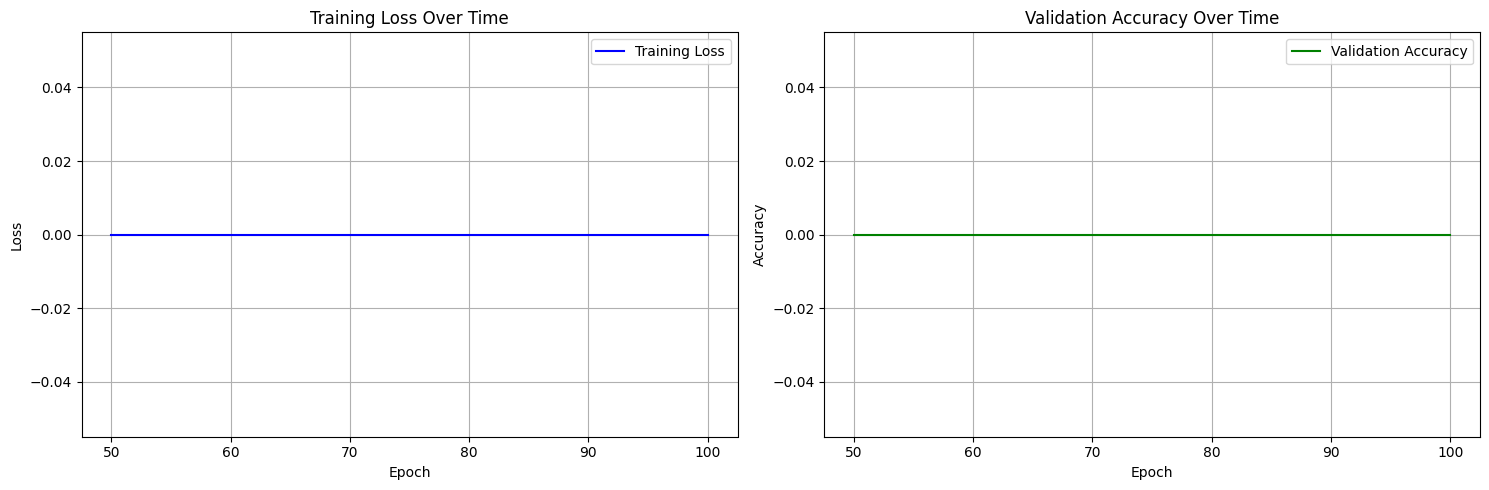


🏆 TRAINING SUMMARY:
  Total epochs: 33
  Best accuracy: 0.0000 (epoch 50)
  Final accuracy: 0.0000
  Latest checkpoint: checkpoints/checkpoint_epoch_100.pth


In [17]:
# Check training results
import glob
import torch
import matplotlib.pyplot as plt

print("📊 TRAINING RESULTS")
print("="*50)

# Find all checkpoints
checkpoint_pattern = os.path.join(TRAINING_CONFIG['checkpoint_dir'], 'checkpoint_epoch_*.pth')
checkpoints = sorted(glob.glob(checkpoint_pattern),
                    key=lambda x: int(x.split('epoch_')[1].split('.')[0]))

if not checkpoints:
    print("❌ No training checkpoints found")
    print("📝 Make sure training has completed successfully")
else:
    print(f"✅ Found {len(checkpoints)} checkpoints")

    # Extract training metrics
    epochs = []
    train_losses = []
    val_accuracies = []

    for checkpoint_path in checkpoints:
        try:
            checkpoint = torch.load(checkpoint_path, map_location='cpu')
            epochs.append(checkpoint['epoch'])
            train_losses.append(checkpoint.get('train_loss', 0))
            val_accuracies.append(checkpoint.get('accuracy', 0))
        except:
            continue

    # Plot training progress
    if epochs:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

        # Training loss
        ax1.plot(epochs, train_losses, 'b-', label='Training Loss')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.set_title('Training Loss Over Time')
        ax1.grid(True)
        ax1.legend()

        # Validation accuracy
        ax2.plot(epochs, val_accuracies, 'g-', label='Validation Accuracy')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy')
        ax2.set_title('Validation Accuracy Over Time')
        ax2.grid(True)
        ax2.legend()

        plt.tight_layout()
        plt.show()

        # Print best results
        best_accuracy = max(val_accuracies)
        best_epoch = epochs[val_accuracies.index(best_accuracy)]
        final_accuracy = val_accuracies[-1] if val_accuracies else 0

        print(f"\n🏆 TRAINING SUMMARY:")
        print(f"  Total epochs: {len(epochs)}")
        print(f"  Best accuracy: {best_accuracy:.4f} (epoch {best_epoch})")
        print(f"  Final accuracy: {final_accuracy:.4f}")
        print(f"  Latest checkpoint: {checkpoints[-1]}")
    else:
        print("❌ Could not extract training metrics from checkpoints")

## 💾 Step 12: Save Model and Results

Save the final trained model and results to Google Drive.

In [22]:
# Save final model and results
import shutil
import glob
from datetime import datetime
import json
import os
import torch # Import torch to check for Tensor type
import numpy as np # Import numpy for potential conversion

print("💾 SAVING MODEL AND RESULTS")
print("="*50)

# Create timestamped folder in Google Drive
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
save_dir = f'/content/drive/MyDrive/ViT_FishID_Results_{timestamp}'
os.makedirs(save_dir, exist_ok=True)

print(f"📁 Saving to: {save_dir}")

# Copy all checkpoints
checkpoint_save_dir = os.path.join(save_dir, 'checkpoints')
if os.path.exists(TRAINING_CONFIG['checkpoint_dir']):
    # Ensure the target directory exists before copying
    os.makedirs(checkpoint_save_dir, exist_ok=True)
    # Use glob to get a list of files to copy, excluding directories
    checkpoint_files = glob.glob(os.path.join(TRAINING_CONFIG['checkpoint_dir'], '*.pth'))
    if checkpoint_files:
        for cp_file in checkpoint_files:
            shutil.copy2(cp_file, checkpoint_save_dir)
        print(f"✅ Saved {len(checkpoint_files)} checkpoints to {checkpoint_save_dir}")
    else:
        print(f"⚠️ No checkpoint files found in {TRAINING_CONFIG['checkpoint_dir']} to copy.")

# Copy configuration files
config_files = ['training_config.json', 'dataset_info.json']
for config_file in config_files:
    if os.path.exists(config_file):
        shutil.copy2(config_file, save_dir)
        print(f"✅ Saved {config_file}")
    else:
        print(f"⚠️ Config file not found: {config_file}. Skipping.")


# Copy training scripts
script_files = ['train.py', 'model.py', 'data.py', 'utils.py']
for script_file in script_files:
    # Check if the script file exists in the current directory
    if os.path.exists(script_file):
        shutil.copy2(script_file, save_dir)
        print(f"✅ Saved {script_file}")
    else:
        # If not found in current directory, check the base repository directory if known
        repo_base_dir = '/content/ViT-FishID' # Assuming the repository is cloned here
        script_path_in_repo = os.path.join(repo_base_dir, script_file)
        if os.path.exists(script_path_in_repo):
            shutil.copy2(script_path_in_repo, save_dir)
            print(f"✅ Saved {script_file} from repository")
        else:
            print(f"⚠️ Script file not found: {script_file}. Skipping.")


# Create results summary
# Need to ensure TRAINING_CONFIG and dataset_info are loaded if not already in scope
try:
    # Check if TRAINING_CONFIG is in the current scope
    TRAINING_CONFIG_summary = TRAINING_CONFIG
except NameError:
    # If not, try loading it from the saved file
    config_path = 'training_config.json'
    if os.path.exists(config_path):
        with open(config_path, 'r') as f:
            TRAINING_CONFIG_summary = json.load(f)
        print("ℹ️ Loaded TRAINING_CONFIG for summary.")
    else:
        TRAINING_CONFIG_summary = {"error": "TRAINING_CONFIG not found or loaded"}
        print("⚠️ TRAINING_CONFIG not found for summary.")

try:
    # Check if dataset_info is in the current scope
    dataset_info_summary = dataset_info
except NameError:
    # If not, try loading it from the saved file
    dataset_info_path = 'dataset_info.json'
    if os.path.exists(dataset_info_path):
        with open(dataset_info_path, 'r') as f:
            dataset_info_summary = json.load(f)
        print("ℹ️ Loaded dataset_info for summary.")
    else:
        dataset_info_summary = {"error": "dataset_info not found or loaded"}
        print("⚠️ dataset_info not found for summary.")


# --- JSON Serialization Fix ---
def convert_tensors_to_list(obj):
    """Recursively converts PyTorch Tensors and NumPy arrays to lists for JSON serialization."""
    if isinstance(obj, torch.Tensor):
        return obj.cpu().numpy().tolist() # Convert to numpy array then list
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, dict):
        return {k: convert_tensors_to_list(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [convert_tensors_to_list(item) for item in obj]
    # Add other types if necessary, e.g., OrderedDict to dict
    elif isinstance(obj, dict): # Handle OrderedDict by converting to dict
         return {k: convert_tensors_to_list(v) for k, v in obj.items()}
    else:
        return obj

# Apply conversion to the data before creating the summary dictionary
# Make a deep copy if necessary to avoid modifying the original objects in scope
import copy
TRAINING_CONFIG_serializable = convert_tensors_to_list(copy.deepcopy(TRAINING_CONFIG_summary))
dataset_info_serializable = convert_tensors_to_list(copy.deepcopy(dataset_info_summary))


results_summary = {
    'timestamp': timestamp,
    'training_config': TRAINING_CONFIG_serializable,
    'dataset_info': dataset_info_serializable,
    'total_checkpoints': len(glob.glob(os.path.join(checkpoint_save_dir, '*.pth'))) if os.path.exists(checkpoint_save_dir) else 0
    # Add other relevant metrics if available, e.g., final accuracy
    # 'final_accuracy': final_accuracy if 'final_accuracy' in globals() else 'N/A'
}

# Attempt to add final accuracy from the 'Check Training Results' cell output if possible
# This is less reliable than saving it directly during training/evaluation,
# but can be done if needed by parsing output or checking global variables
try:
    results_summary['final_accuracy'] = final_accuracy # From cell fe081dc1 output
    results_summary['best_accuracy'] = best_accuracy # From cell fe081dc1 output
    results_summary['best_epoch'] = best_epoch # From cell fe081dc1 output
    print("ℹ️ Added final/best accuracy to summary.")
except NameError:
    print("⚠️ Final/best accuracy variables not found. Skipping.")


try:
    # Save the summary
    summary_path = os.path.join(save_dir, 'results_summary.json')
    with open(summary_path, 'w') as f:
        json.dump(results_summary, f, indent=2)
    print(f"✅ Results summary saved to Google Drive: {summary_path}")

except Exception as e:
    print(f"❌ Error saving results summary: {e}")
    print("💡 Ensure all data being saved in the summary is JSON serializable.")


print(f"\n✅ All results saved to Google Drive!")
print(f"📁 Location: {save_dir}")
print(f"\n📋 Saved files:")
# List contents of the saved directory to verify
if os.path.exists(save_dir):
    for item in os.listdir(save_dir):
        item_path = os.path.join(save_dir, item)
        if os.path.isdir(item_path):
            print(f"  📁 {item}/")
        else:
            print(f"  📄 {item}")
else:
    print("❌ Saved directory not found after attempting to save.")

💾 SAVING MODEL AND RESULTS
📁 Saving to: /content/drive/MyDrive/ViT_FishID_Results_20250820_002255


KeyboardInterrupt: 

## 🧪 Step 13: Model Evaluation

Evaluate the trained model on test data with comprehensive metrics and visualizations.

In [ ]:
# Model selection for evaluation
import glob
import os

print("🧪 MODEL EVALUATION SETUP")
print("="*50)

# Find available models
checkpoint_locations = [
    '/content/drive/MyDrive/ViT-FishID/checkpoints_backup',
    
]

found_models = []
for location in checkpoint_locations:
    if '*' in location:
        found_models.extend(glob.glob(location, recursive=True))
    elif os.path.exists(location):
        found_models.extend(glob.glob(os.path.join(location, '*.pth')))

if not found_models:
    print("❌ No trained models found for evaluation")
    print("📝 Please complete training first")
else:
    print(f"✅ Found {len(found_models)} model checkpoints")

    # Select best model (highest epoch number or best accuracy)
    latest_model = max(found_models, key=lambda x:
                      int(x.split('epoch_')[1].split('.')[0]) if 'epoch_' in x else 0)

    print(f"🎯 Selected model: {latest_model}")

    # Set paths for evaluation
    SELECTED_MODEL_PATH = latest_model
    TEST_DATA_PATH = TRAINING_CONFIG['labeled_data_path']  # Use labeled data for testing

    print(f"📊 Test data path: {TEST_DATA_PATH}")
    print(f"\n✅ Ready for model evaluation!")

🧪 MODEL EVALUATION SETUP
✅ Found 32 model checkpoints
🎯 Selected model: /content/drive/MyDrive/ViT-FishID/checkpoints_backup/checkpoint_epoch_100.pth
📊 Test data path: /content/fish_cutouts/labeled

✅ Ready for model evaluation!


🎯 Starting evaluation...
Model: /content/drive/MyDrive/ViT-FishID/checkpoints_backup/checkpoint_epoch_100.pth
Test Data: /content/fish_cutouts/labeled
Device: cuda
🚀 FAST EVALUATION STARTING...
Time: 00:39:56
📁 Loading test dataset...
✅ Loaded dataset info: 34 classes, data from /content/fish_cutouts
📊 Supervised data loaders created:
  - Train samples: 3,081
  - Val samples: 1,028
  - Test samples: 1,028
  - Classes: 33
  - Split ratios: Train=60.0%, Val=20.0%, Test=20.0%
⚠️ Warning: Mismatch between dataset_info (34) and dataloader (33) number of classes.
🎯 Using 33 classes for model initialization based on dataloader.
✅ Dataset loaded using create_dataloaders: 1028 test images in 0.1s

🧠 Loading model...


/content/ViT-FishID/data.py:229: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(10.0, 50.0), p=0.3),


✅ Student model loaded from semi-supervised checkpoint (epoch 100)
   Model loading took: 2.9s

📋 Using class names from data loaders for results...
   Sample class names: ['Carangidae_Pseudocaranx_dentex', 'Carangidae_Seriola_dumerili', 'Carangidae_Seriola_lalandi', 'Carangidae_Seriola_rivoliana', 'Carangidae_Trachurus_delagoa']...

🔬 Starting evaluation...


Evaluating: 100%|██████████| 33/33 [00:02<00:00, 12.22it/s]



✅ Evaluation complete!
   Total time: 2.7s
   Speed: 380.2 images/second

📊 EVALUATION RESULTS
Overall Accuracy: 0.8113 (81.13%)
Total Images Processed: 1028
Total Evaluation Time: 5.8s

📊 Generating visualizations...


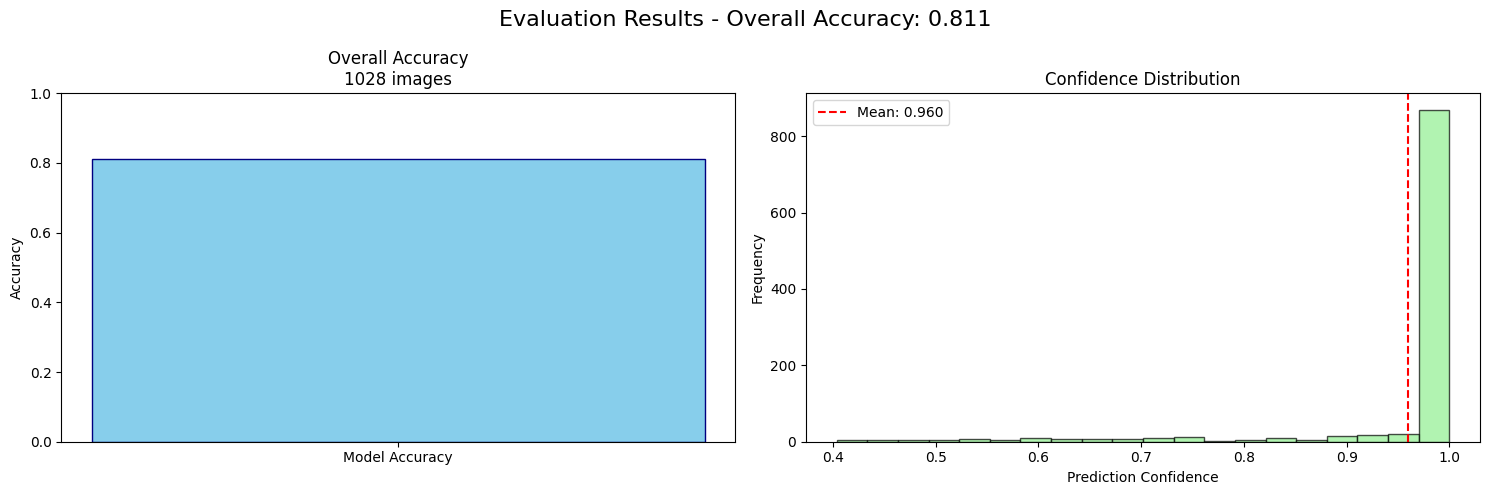


📋 Detailed Classification Report:
Note: Showing results for 33 classes present in test data (out of 33 total classes)
                                        precision    recall  f1-score   support

        Carangidae_Pseudocaranx_dentex       0.50      1.00      0.67         1
           Carangidae_Seriola_dumerili       0.00      0.00      0.00         1
            Carangidae_Seriola_lalandi       0.67      0.40      0.50         5
          Carangidae_Seriola_rivoliana       0.50      0.33      0.40         3
          Carangidae_Trachurus_delagoa       0.93      0.93      0.93        41
  Serranidae_Aulacocephalus_temminckii       1.00      1.00      1.00         2
      Serranidae_Epinephelus_andersoni       0.25      0.40      0.31         5
     Serranidae_Epinephelus_marginatus       0.67      0.50      0.57         4
      Serranidae_Epinephelus_rivulatus       1.00      0.17      0.29         6
         Serranidae_Epinephelus_tukula       0.00      0.00      0.00         1


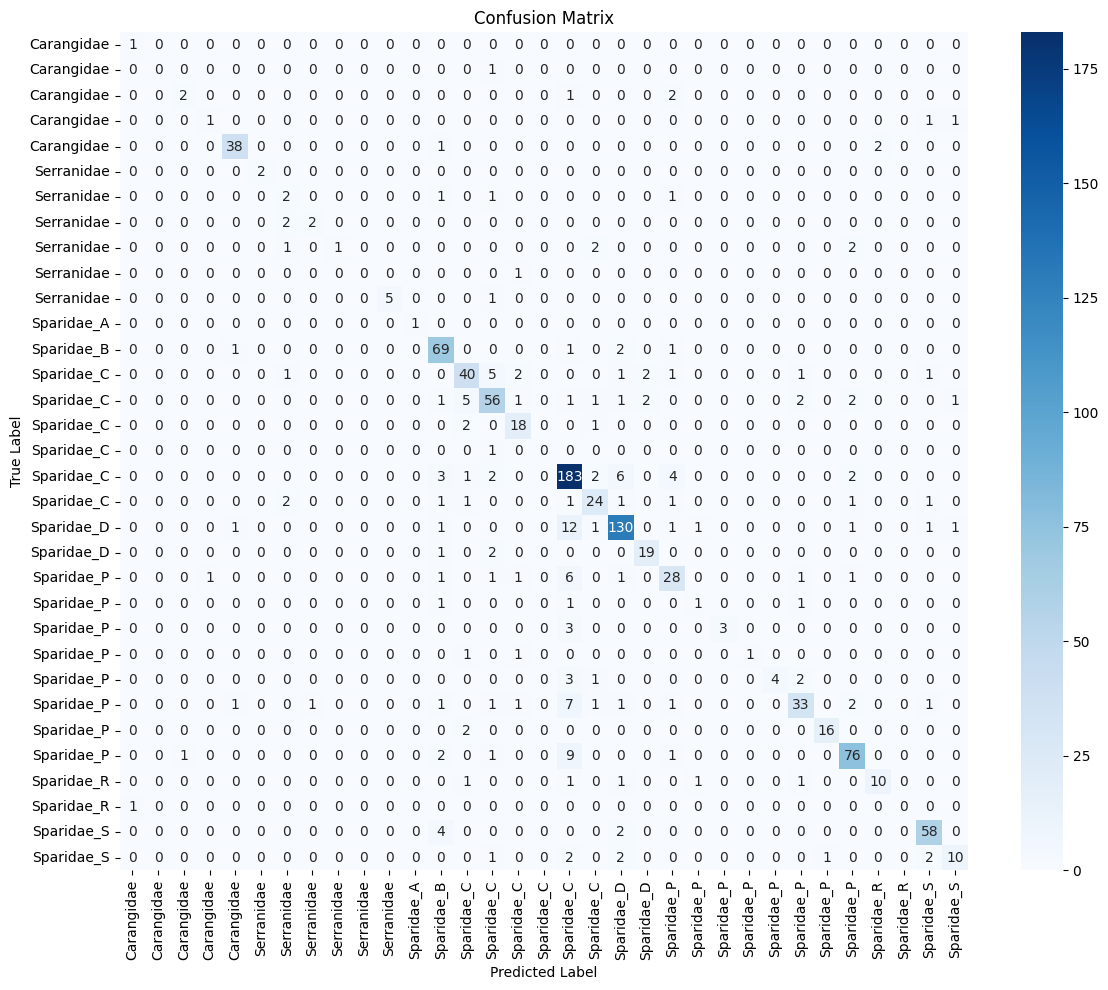


🎉 EVALUATION COMPLETED!
Final Accuracy: 0.8113


In [ ]:
# Enhanced Model Evaluation with Top-1, Top-5, Metrics Export & Species Indexing
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import time
import sys
from tqdm import tqdm
import json
import os
from datetime import datetime

def create_species_index_mapping(class_names):
    """Create a mapping from full species names to indices and shortened names"""
    species_index = {}
    index_to_species = {}
    shortened_names = []
    
    for idx, full_name in enumerate(class_names):
        # Create shortened name (first letter of family + first few letters of species)
        parts = full_name.split('_')
        if len(parts) >= 3:
            family = parts[0]
            genus = parts[1] 
            species = parts[2]
            shortened = f"{family[0]}{genus[0]}{species[:3]}"
        else:
            shortened = full_name[:6]
        
        species_index[full_name] = idx
        index_to_species[idx] = full_name
        shortened_names.append(f"{idx:02d}_{shortened}")
    
    return species_index, index_to_species, shortened_names

def calculate_topk_accuracy(predictions_probs, labels, k=5):
    """Calculate top-k accuracy"""
    # Get top-k predictions for each sample
    _, topk_pred = torch.topk(torch.tensor(predictions_probs), k, dim=1)
    
    # Check if true label is in top-k predictions
    labels_expanded = torch.tensor(labels).unsqueeze(1).expand_as(topk_pred)
    correct = (topk_pred == labels_expanded).any(dim=1)
    
    return correct.float().mean().item()

def enhanced_model_evaluation(model_path, data_path, device='cuda', max_batches=None, save_results=True):
    """
    Enhanced evaluation with comprehensive metrics and file export
    """
    print(f"🚀 ENHANCED MODEL EVALUATION")
    print(f"Time: {time.strftime('%H:%M:%S')}")
    print("=" * 70)
    
    start_time = time.time()
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    # Load test dataset with progress
    print("📁 Loading test dataset...")
    try:
        from data import create_dataloaders
        
        # Load dataset info
        dataset_info_path = 'dataset_info.json'
        if not os.path.exists(dataset_info_path):
            repo_base_dir = '/content/ViT-FishID'
            dataset_info_path = os.path.join(repo_base_dir, 'dataset_info.json')

        if os.path.exists(dataset_info_path):
            with open(dataset_info_path, 'r') as f:
                dataset_info_loaded = json.load(f)
            num_classes_dataset = dataset_info_loaded['num_species']
            parent_data_dir = os.path.dirname(dataset_info_loaded['labeled_path'])
            print(f"✅ Loaded dataset info: {num_classes_dataset} classes, data from {parent_data_dir}")
        else:
            print("❌ dataset_info.json not found.")
            return None

        # Create data loaders
        train_loader, val_loader, test_loader, class_names = create_dataloaders(
            data_dir=parent_data_dir,
            batch_size=32,
            image_size=224,
            val_split=0.2,
            test_split=0.2,
            seed=42,
            num_workers=2
        )

        num_classes = len(class_names)
        dataset_load_time = time.time() - start_time
        print(f"✅ Dataset loaded: {len(test_loader.dataset)} test images in {dataset_load_time:.1f}s")
        
        # Create species indexing
        species_index, index_to_species, shortened_names = create_species_index_mapping(class_names)
        print(f"✅ Species indexing created: {len(species_index)} species")

    except Exception as e:
        print(f"❌ Dataset loading failed: {e}")
        import traceback
        traceback.print_exc()
        return None

    # Load model
    print("\n🧠 Loading model...")
    model_start_time = time.time()
    
    try:
        from model import ViTForFishClassification
        
        model = ViTForFishClassification(num_classes=num_classes)
        checkpoint = torch.load(model_path, map_location=device)
        
        if 'model_state_dict' in checkpoint:
            model.load_state_dict(checkpoint['model_state_dict'])
            epoch = checkpoint.get('epoch', 'Unknown')
            print(f"✅ Model loaded from epoch {epoch}")
        elif 'student_state_dict' in checkpoint:
            model.load_state_dict(checkpoint['student_state_dict'])
            epoch = checkpoint.get('epoch', 'Unknown')
            print(f"✅ Student model loaded from epoch {epoch}")
        else:
            model.load_state_dict(checkpoint)
            print(f"✅ Model loaded from checkpoint")
        
        model.to(device)
        model.eval()
        
        model_load_time = time.time() - model_start_time
        print(f"   Model loading took: {model_load_time:.1f}s")

    except Exception as e:
        print(f"❌ Model loading failed: {e}")
        import traceback
        traceback.print_exc()
        return None

    # Evaluation with progress bar
    print(f"\n🔬 Starting comprehensive evaluation...")
    eval_start_time = time.time()
    
    all_predictions = []
    all_labels = []
    all_probabilities = []
    
    total_batches = len(test_loader)
    if max_batches:
        total_batches = min(total_batches, max_batches)
    
    # Progress bar
    pbar = tqdm(total=total_batches, desc="Evaluating", 
                bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}, {rate_fmt}]')
    
    with torch.no_grad():
        for batch_idx, (images, labels) in enumerate(test_loader):
            if max_batches and batch_idx >= max_batches:
                break
                
            batch_start = time.time()
            
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            probabilities = torch.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, 1)
            
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probabilities.extend(probabilities.cpu().numpy())
            
            batch_time = time.time() - batch_start
            
            pbar.set_postfix({
                'Batch_Time': f'{batch_time:.2f}s',
                'Images/s': f'{len(images)/batch_time:.1f}',
                'Processed': f'{len(all_predictions)}'
            })
            pbar.update(1)
    
    pbar.close()
    eval_time = time.time() - eval_start_time
    
    print(f"\n✅ Evaluation complete!")
    print(f"   Total time: {eval_time:.1f}s")
    print(f"   Speed: {len(all_predictions)/eval_time:.1f} images/second")
    
    # Calculate comprehensive metrics
    print(f"\n📊 CALCULATING COMPREHENSIVE METRICS...")
    
    # Convert to numpy arrays
    all_predictions = np.array(all_predictions)
    all_labels = np.array(all_labels)
    all_probabilities = np.array(all_probabilities)
    
    # Top-1 and Top-5 accuracy
    top1_accuracy = accuracy_score(all_labels, all_predictions)
    top5_accuracy = calculate_topk_accuracy(all_probabilities, all_labels, k=5)
    
    # Per-class metrics
    precision, recall, f1_score, support = precision_recall_fscore_support(
        all_labels, all_predictions, average=None, zero_division=0
    )
    
    # Macro and weighted averages
    precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(
        all_labels, all_predictions, average='macro', zero_division=0
    )
    precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(
        all_labels, all_predictions, average='weighted', zero_division=0
    )
    
    # Confidence statistics
    confidences = np.max(all_probabilities, axis=1)
    mean_confidence = np.mean(confidences)
    correct_mask = (all_predictions == all_labels)
    
    # Confusion matrix
    cm = confusion_matrix(all_labels, all_predictions)
    
    print(f"\n🎯 EVALUATION RESULTS")
    print("=" * 50)
    print(f"📊 Top-1 Accuracy: {top1_accuracy:.4f} ({top1_accuracy*100:.2f}%)")
    print(f"📊 Top-5 Accuracy: {top5_accuracy:.4f} ({top5_accuracy*100:.2f}%)")
    print(f"📊 Macro F1-Score: {f1_macro:.4f}")
    print(f"📊 Weighted F1-Score: {f1_weighted:.4f}")
    print(f"📊 Mean Confidence: {mean_confidence:.4f}")
    print(f"📊 Total Test Samples: {len(all_labels)}")
    print(f"📊 Number of Classes: {num_classes}")
    
    # Create comprehensive results dictionary
    results = {
        'evaluation_metadata': {
            'timestamp': timestamp,
            'model_path': model_path,
            'data_path': data_path,
            'device': str(device),
            'evaluation_time_seconds': eval_time,
            'total_samples': len(all_labels),
            'num_classes': num_classes
        },
        'accuracy_metrics': {
            'top1_accuracy': float(top1_accuracy),
            'top5_accuracy': float(top5_accuracy)
        },
        'aggregate_metrics': {
            'precision_macro': float(precision_macro),
            'recall_macro': float(recall_macro),
            'f1_score_macro': float(f1_macro),
            'precision_weighted': float(precision_weighted),
            'recall_weighted': float(recall_weighted),
            'f1_score_weighted': float(f1_weighted)
        },
        'confidence_metrics': {
            'mean_confidence': float(mean_confidence),
            'high_confidence_samples': int(np.sum(confidences > 0.9)),
            'low_confidence_samples': int(np.sum(confidences < 0.5)),
            'confidence_std': float(np.std(confidences))
        },
        'species_indexing': {
            'species_index': species_index,
            'index_to_species': index_to_species,
            'shortened_names': shortened_names
        },
        'per_class_metrics': {}
    }
    
    # Calculate per-class metrics
    for i, class_name in enumerate(class_names):
        mask = (all_labels == i)
        class_samples = np.sum(mask)
        
        if class_samples > 0:
            class_accuracy = np.sum((all_predictions == i) & mask) / class_samples
            results['per_class_metrics'][f'class_{i:02d}'] = {
                'species_name': class_name,
                'shortened_name': shortened_names[i],
                'samples': int(class_samples),
                'accuracy': float(class_accuracy),
                'precision': float(precision[i]),
                'recall': float(recall[i]),
                'f1_score': float(f1_score[i])
            }
    
    # Save results to files
    if save_results:
        print(f"\n💾 SAVING EVALUATION RESULTS...")
        
        # Create results directory
        results_dir = f"evaluation_results_{timestamp}"
        os.makedirs(results_dir, exist_ok=True)
        
        # Save comprehensive results as JSON
        json_path = os.path.join(results_dir, f"evaluation_metrics_{timestamp}.json")
        with open(json_path, 'w') as f:
            json.dump(results, f, indent=2)
        print(f"✅ Metrics saved to: {json_path}")
        
        # Save species index mapping
        index_path = os.path.join(results_dir, f"species_index_{timestamp}.json")
        index_mapping = {
            'species_to_index': species_index,
            'index_to_species': {str(k): v for k, v in index_to_species.items()},
            'shortened_names': {str(i): name for i, name in enumerate(shortened_names)},
            'full_names': class_names
        }
        with open(index_path, 'w') as f:
            json.dump(index_mapping, f, indent=2)
        print(f"✅ Species indexing saved to: {index_path}")
        
        # Save confusion matrix
        cm_path = os.path.join(results_dir, f"confusion_matrix_{timestamp}.csv")
        np.savetxt(cm_path, cm, delimiter=',', fmt='%d')
        print(f"✅ Confusion matrix saved to: {cm_path}")
        
        # Save detailed classification report
        report_path = os.path.join(results_dir, f"classification_report_{timestamp}.txt")
        with open(report_path, 'w') as f:
            f.write(f"ENHANCED MODEL EVALUATION REPORT\n")
            f.write(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
            f.write(f"Model: {model_path}\n")
            f.write(f"Data: {data_path}\n\n")
            f.write(f"ACCURACY METRICS:\n")
            f.write(f"Top-1 Accuracy: {top1_accuracy:.4f} ({top1_accuracy*100:.2f}%)\n")
            f.write(f"Top-5 Accuracy: {top5_accuracy:.4f} ({top5_accuracy*100:.2f}%)\n\n")
            f.write(f"AGGREGATE METRICS:\n")
            f.write(f"Macro F1-Score: {f1_macro:.4f}\n")
            f.write(f"Weighted F1-Score: {f1_weighted:.4f}\n")
            f.write(f"Macro Precision: {precision_macro:.4f}\n")
            f.write(f"Macro Recall: {recall_macro:.4f}\n\n")
            f.write(f"SPECIES INDEX MAPPING:\n")
            for i, (full_name, short_name) in enumerate(zip(class_names, shortened_names)):
                f.write(f"{i:02d}: {short_name} = {full_name}\n")
            f.write(f"\nDETAILED CLASSIFICATION REPORT:\n")
            f.write(classification_report(all_labels, all_predictions, 
                                        target_names=[f"{i:02d}_{name}" for i, name in enumerate(shortened_names)]))
        print(f"✅ Detailed report saved to: {report_path}")
        
        print(f"📁 All results saved in directory: {results_dir}")
    
    # Generate visualizations with indexed species names
    print(f"\n📊 Generating visualizations with species indexing...")
    
    # Set up plots
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    fig.suptitle(f'Enhanced Evaluation Results - Top-1: {top1_accuracy:.3f}, Top-5: {top5_accuracy:.3f}', 
                 fontsize=16)
    
    # 1. Top-1 vs Top-5 Accuracy
    accuracies = [top1_accuracy, top5_accuracy]
    accuracy_labels = ['Top-1', 'Top-5']
    bars = axes[0,0].bar(accuracy_labels, accuracies, color=['skyblue', 'lightgreen'], edgecolor='navy')
    axes[0,0].set_ylim(0, 1)
    axes[0,0].set_title(f'Top-K Accuracy Comparison\n{len(all_labels)} test images')
    axes[0,0].set_ylabel('Accuracy')
    for bar, acc in zip(bars, accuracies):
        axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                      f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # 2. Per-class F1-scores (using indexed names)
    class_indices = list(range(min(len(f1_score), 20)))  # Limit to first 20 for readability
    f1_subset = f1_score[:20] if len(f1_score) > 20 else f1_score
    colors = ['green' if f1 >= 0.8 else 'orange' if f1 >= 0.6 else 'red' for f1 in f1_subset]
    
    bars = axes[0,1].bar(class_indices, f1_subset, color=colors, alpha=0.7)
    axes[0,1].set_xlabel('Species Index')
    axes[0,1].set_ylabel('F1-Score')
    axes[0,1].set_title(f'Per-Class F1-Score (First 20 Species)\nMacro F1: {f1_macro:.3f}')
    axes[0,1].set_xticks(class_indices)
    axes[0,1].set_ylim(0, 1)
    
    # 3. Confusion Matrix (simplified for many classes)
    if num_classes <= 15:
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1,0],
                   xticklabels=[f"{i:02d}" for i in range(num_classes)],
                   yticklabels=[f"{i:02d}" for i in range(num_classes)])
        axes[1,0].set_title('Confusion Matrix (Indexed)')
    else:
        im = axes[1,0].imshow(cm, cmap='Blues', aspect='auto')
        axes[1,0].set_title(f'Confusion Matrix ({num_classes} classes)')
        axes[1,0].set_xlabel('Predicted Class Index')
        axes[1,0].set_ylabel('Actual Class Index')
        plt.colorbar(im, ax=axes[1,0])
    
    # 4. Confidence Distribution
    correct_confidences = confidences[correct_mask]
    incorrect_confidences = confidences[~correct_mask]
    
    axes[1,1].hist(correct_confidences, bins=20, alpha=0.7, 
                  label=f'Correct ({len(correct_confidences)})', color='green', density=True)
    axes[1,1].hist(incorrect_confidences, bins=20, alpha=0.7,
                  label=f'Incorrect ({len(incorrect_confidences)})', color='red', density=True)
    axes[1,1].axvline(mean_confidence, color='black', linestyle='--',
                     label=f'Mean: {mean_confidence:.3f}')
    axes[1,1].set_xlabel('Prediction Confidence')
    axes[1,1].set_ylabel('Density')
    axes[1,1].set_title('Confidence Distribution')
    axes[1,1].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print species index mapping
    print(f"\n🏷️  SPECIES INDEX MAPPING:")
    print("=" * 60)
    print("Index | Short Name    | Full Species Name")
    print("-" * 60)
    for i, (full_name, short_name) in enumerate(zip(class_names, shortened_names)):
        print(f"{i:02d}   | {short_name:12s} | {full_name}")
    
    # Print top and worst performing species
    f1_with_names = [(f1_score[i], i, class_names[i], shortened_names[i]) 
                     for i in range(len(class_names)) 
                     if i < len(f1_score) and support[i] > 0]
    f1_with_names.sort(reverse=True, key=lambda x: x[0])
    
    print(f"\n🏆 TOP 5 PERFORMING SPECIES (by F1-Score):")
    for f1, idx, full_name, short_name in f1_with_names[:5]:
        print(f"  {idx:02d} ({short_name}): {f1:.3f} - {full_name}")
    
    print(f"\n⚠️  BOTTOM 5 PERFORMING SPECIES (by F1-Score):")
    for f1, idx, full_name, short_name in f1_with_names[-5:]:
        print(f"  {idx:02d} ({short_name}): {f1:.3f} - {full_name}")
    
    return results

# Run enhanced evaluation
if 'SELECTED_MODEL_PATH' in globals() and 'TEST_DATA_PATH' in globals():
    print(f"🎯 Starting enhanced evaluation with comprehensive metrics...")
    print(f"Model: {SELECTED_MODEL_PATH}")
    print(f"Test Data: {TEST_DATA_PATH}")
    print(f"Device: {DEVICE}")
    
    results = enhanced_model_evaluation(
        model_path=SELECTED_MODEL_PATH,
        data_path=TEST_DATA_PATH,
        device=DEVICE,
        save_results=True
    )
    
    if results:
        print(f"\n🎉 ENHANCED EVALUATION COMPLETED!")
        print(f"📊 Top-1 Accuracy: {results['accuracy_metrics']['top1_accuracy']:.4f}")
        print(f"📊 Top-5 Accuracy: {results['accuracy_metrics']['top5_accuracy']:.4f}")
        print(f"📊 Macro F1-Score: {results['aggregate_metrics']['f1_score_macro']:.4f}")
        print(f"💾 Results exported to files with timestamp")
else:
    print("⚠️ Please run the model selection cell first")

## 🎯 Quick Test: Evaluate Trained Model

**Use this cell to quickly test your already trained ViT model with proper train/val/test split (60/20/20)**

This will load your checkpoint from epoch 100 and evaluate it on the test set.

🚀 Starting test evaluation...
🎯 TESTING TRAINED ViT MODEL
Model: /content/drive/MyDrive/ViT_FishID_Results/checkpoints/checkpoint_epoch_100.pth
Data: /content/fish_cutouts/labeled
Device: cuda
Random Seed: 42 (same as training)

📁 Loading test data (using same split logic as training)...
📊 Supervised data loaders created:
  - Train samples: 3,081
  - Val samples: 1,028
  - Test samples: 1,028
  - Classes: 33
  - Split ratios: Train=60.0%, Val=20.0%, Test=20.0%
✅ Test data loaded:
   Test samples: 1028
   Classes: 33
   Class names: ['Carangidae_Pseudocaranx_dentex', 'Carangidae_Seriola_dumerili', 'Carangidae_Seriola_lalandi', 'Carangidae_Seriola_rivoliana', 'Carangidae_Trachurus_delagoa']...

🧠 Loading trained model...


/content/ViT-FishID/data.py:229: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(10.0, 50.0), p=0.3),


✅ Model loaded from epoch 100
   Best training accuracy: 82.68482490272373

🔬 Evaluating on test set...


Testing: 100%|██████████| 33/33 [00:04]



🎉 EVALUATION COMPLETE!
⏱️  Total time: 20.7s
📊 Test Accuracy: 0.8113 (81.13%)
🧮 Total test images: 1028

📈 Per-Class Results:
  Carangidae_Pseudocaranx_d: 1.000 (  1 samples)
  Carangidae_Seriola_dumeri: 0.000 (  1 samples)
  Carangidae_Seriola_laland: 0.400 (  5 samples)
  Carangidae_Seriola_rivoli: 0.333 (  3 samples)
  Carangidae_Trachurus_dela: 0.927 ( 41 samples)
  Serranidae_Aulacocephalus: 1.000 (  2 samples)
  Serranidae_Epinephelus_an: 0.400 (  5 samples)
  Serranidae_Epinephelus_ma: 0.500 (  4 samples)
  Serranidae_Epinephelus_ri: 0.167 (  6 samples)
  Serranidae_Epinephelus_tu: 0.000 (  1 samples)
  Serranidae_Serranus_knysn: 0.833 (  6 samples)
  Sparidae_Argyrops_spinife: 1.000 (  1 samples)
  Sparidae_Boopsoidea_inorn: 0.932 ( 74 samples)
  Sparidae_Cheimerius_nufar: 0.741 ( 54 samples)
  Sparidae_Chrysoblephus_an: 0.767 ( 73 samples)
  Sparidae_Chrysoblephus_cr: 0.857 ( 21 samples)
  Sparidae_Chrysoblephus_lo: 0.000 (  1 samples)
  Sparidae_Chrysoblephus_pu: 0.901 (203 

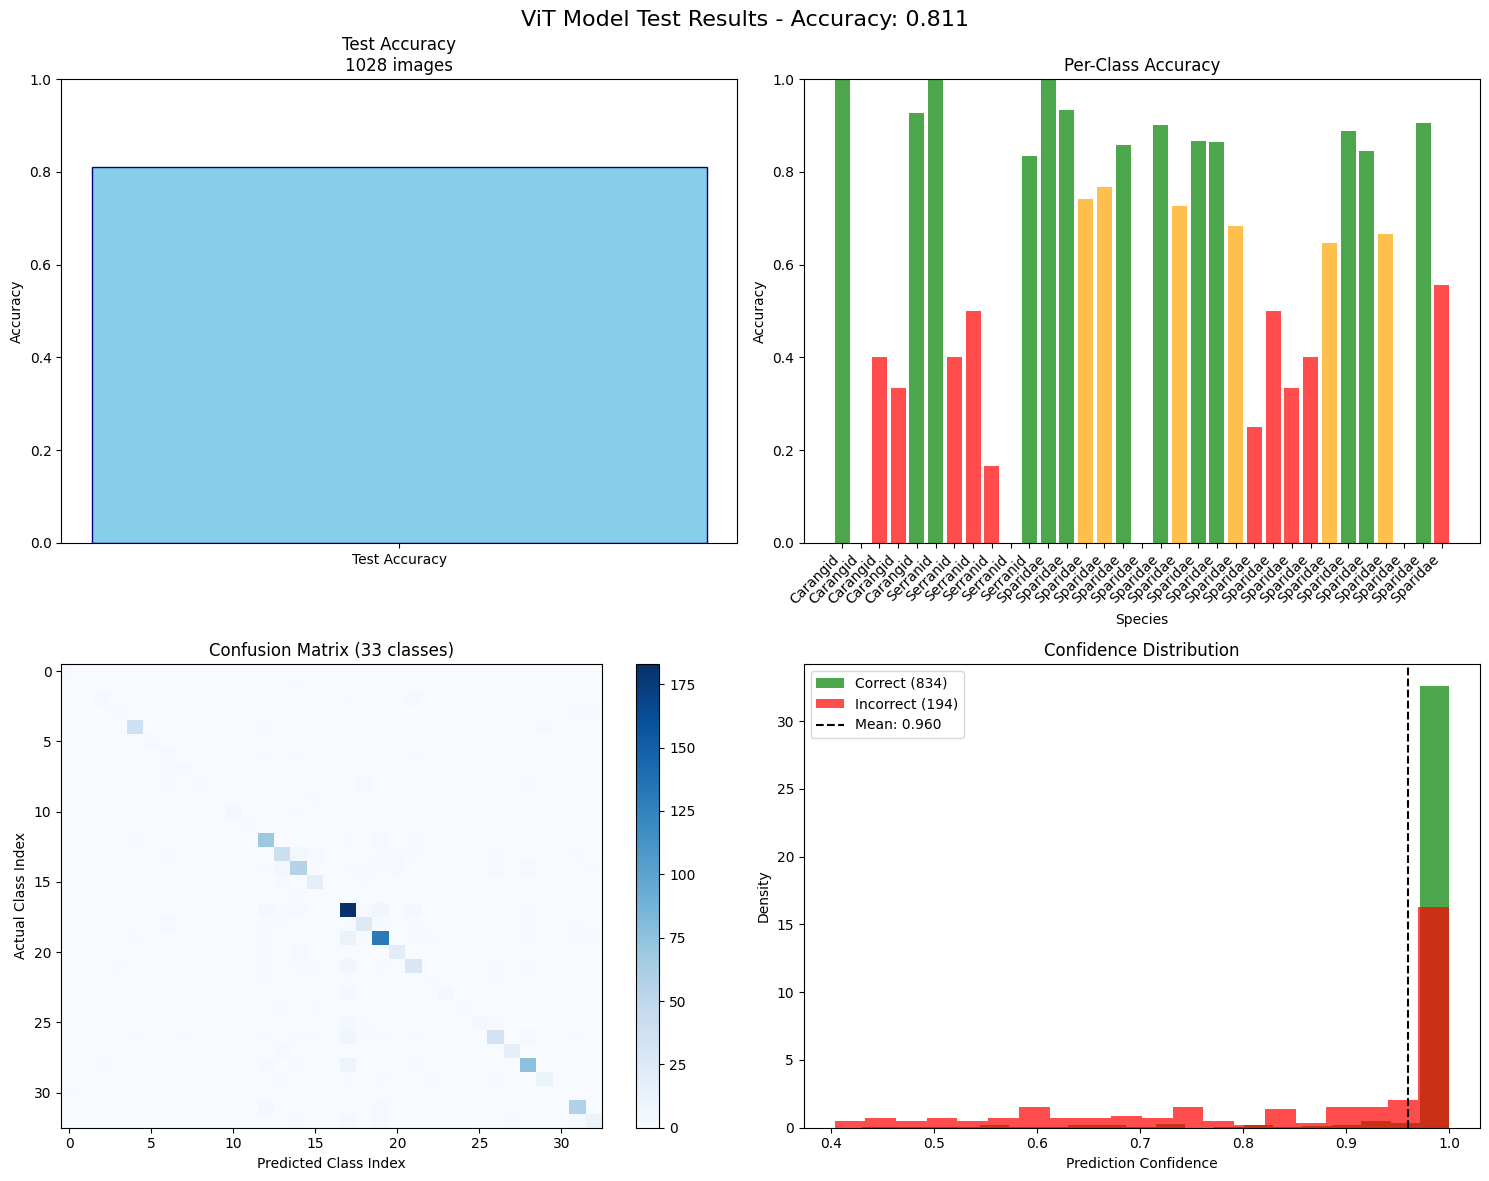


📋 Detailed Classification Report:
Note: Showing results for 33 classes present in test data (out of 33 total classes)
                                        precision    recall  f1-score   support

        Carangidae_Pseudocaranx_dentex       0.50      1.00      0.67         1
           Carangidae_Seriola_dumerili       0.00      0.00      0.00         1
            Carangidae_Seriola_lalandi       0.67      0.40      0.50         5
          Carangidae_Seriola_rivoliana       0.50      0.33      0.40         3
          Carangidae_Trachurus_delagoa       0.93      0.93      0.93        41
  Serranidae_Aulacocephalus_temminckii       1.00      1.00      1.00         2
      Serranidae_Epinephelus_andersoni       0.25      0.40      0.31         5
     Serranidae_Epinephelus_marginatus       0.67      0.50      0.57         4
      Serranidae_Epinephelus_rivulatus       1.00      0.17      0.29         6
         Serranidae_Epinephelus_tukula       0.00      0.00      0.00         1


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Enhanced Test Trained ViT Model - Complete Evaluation with Metrics Export
%pip install -q seaborn

import torch
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
import time
from tqdm import tqdm
import json
from datetime import datetime

def create_species_index_mapping(class_names):
    """Create a mapping from full species names to indices and shortened names"""
    species_index = {}
    index_to_species = {}
    shortened_names = []
    
    for idx, full_name in enumerate(class_names):
        # Create shortened name (first letter of family + first few letters of species)
        parts = full_name.split('_')
        if len(parts) >= 3:
            family = parts[0]
            genus = parts[1] 
            species = parts[2]
            shortened = f"{family[0]}{genus[0]}{species[:3]}"
        else:
            shortened = full_name[:6]
        
        species_index[full_name] = idx
        index_to_species[idx] = full_name
        shortened_names.append(f"{idx:02d}_{shortened}")
    
    return species_index, index_to_species, shortened_names

def calculate_topk_accuracy(predictions_probs, labels, k=5):
    """Calculate top-k accuracy"""
    # Get top-k predictions for each sample
    _, topk_pred = torch.topk(torch.tensor(predictions_probs), k, dim=1)
    
    # Check if true label is in top-k predictions
    labels_expanded = torch.tensor(labels).unsqueeze(1).expand_as(topk_pred)
    correct = (topk_pred == labels_expanded).any(dim=1)
    
    return correct.float().mean().item()

def enhanced_test_trained_model(model_path, data_path, device='cuda', seed=42, save_results=True):
    """
    Enhanced test with comprehensive metrics and file export
    """
    print("🎯 ENHANCED TESTING OF TRAINED ViT MODEL")
    print("=" * 70)
    print(f"Model: {model_path}")
    print(f"Data: {data_path}")
    print(f"Device: {device}")
    print(f"Random Seed: {seed} (same as training)")
    
    start_time = time.time()
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

    # Check if files exist
    if not os.path.exists(model_path):
        print(f"❌ Model not found: {model_path}")
        return None

    if not os.path.exists(data_path):
        print(f"❌ Data path not found: {data_path}")
        return None

    # Load test data using same split logic as training
    print("\n📁 Loading test data (using same split logic as training)...")
    try:
        from data import create_dataloaders

        # Create data loaders with same parameters as training
        train_loader, val_loader, test_loader, class_names = create_dataloaders(
            data_dir=data_path,
            batch_size=32,
            image_size=224,
            val_split=0.2,      # Same as training
            test_split=0.2,     # Same as training
            seed=seed,          # Same seed = same split
            num_workers=2
        )

        # Create dataset info dictionary
        dataset_info = {'class_names': class_names}
        num_classes = len(class_names)

        print(f"✅ Test data loaded:")
        print(f"   Test samples: {len(test_loader.dataset)}")
        print(f"   Classes: {len(dataset_info['class_names'])}")
        print(f"   Class names: {dataset_info['class_names'][:5]}{'...' if len(dataset_info['class_names']) > 5 else ''}")
        
        # Create species indexing
        species_index, index_to_species, shortened_names = create_species_index_mapping(class_names)
        print(f"✅ Species indexing created: {len(species_index)} species")

    except Exception as e:
        print(f"❌ Failed to load test data: {e}")
        return None

    # Load the trained model
    print(f"\n🧠 Loading trained model...")
    try:
        from model import ViTForFishClassification

        model = ViTForFishClassification(num_classes=num_classes)

        # Load checkpoint
        checkpoint = torch.load(model_path, map_location=device)

        if 'student_state_dict' in checkpoint:
            # This is a semi-supervised training checkpoint
            model.load_state_dict(checkpoint['student_state_dict'])
            epoch = checkpoint.get('epoch', 'Unknown')
            train_acc = checkpoint.get('best_accuracy', 'Unknown')
            print(f"✅ Model loaded from epoch {epoch}")
            print(f"   Best training accuracy: {train_acc}")
        elif 'model_state_dict' in checkpoint:
            # This is a standard training checkpoint
            model.load_state_dict(checkpoint['model_state_dict'])
            epoch = checkpoint.get('epoch', 'Unknown')
            train_acc = checkpoint.get('accuracy', 'Unknown')
            print(f"✅ Model loaded from epoch {epoch}")
            print(f"   Training accuracy: {train_acc}")
        else:
            # This is just the model weights
            model.load_state_dict(checkpoint)
            print(f"✅ Model state dict loaded")

        model.to(device)
        model.eval()

    except Exception as e:
        print(f"❌ Model loading failed: {e}")
        return None

    # Run evaluation on test set
    print(f"\n🔬 Running comprehensive evaluation on test set...")

    all_predictions = []
    all_labels = []
    all_probabilities = []
    correct = 0
    total = 0

    # Progress bar for test batches
    pbar = tqdm(test_loader, desc="Testing",
                bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}]')

    with torch.no_grad():
        for batch_idx, (images, labels) in enumerate(pbar):
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            probabilities = torch.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, 1)

            # Collect results
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probabilities.extend(probabilities.cpu().numpy())

            # Update accuracy
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            current_acc = 100 * correct / total

            pbar.set_postfix({'Accuracy': f'{current_acc:.2f}%'})

    eval_time = time.time() - start_time
    
    # Calculate comprehensive metrics
    print(f"\n📊 CALCULATING COMPREHENSIVE METRICS...")
    
    # Convert to numpy arrays
    all_predictions = np.array(all_predictions)
    all_labels = np.array(all_labels)
    all_probabilities = np.array(all_probabilities)
    
    # Top-1 and Top-5 accuracy
    top1_accuracy = accuracy_score(all_labels, all_predictions)
    top5_accuracy = calculate_topk_accuracy(all_probabilities, all_labels, k=5)
    
    # Per-class metrics
    precision, recall, f1_score, support = precision_recall_fscore_support(
        all_labels, all_predictions, average=None, zero_division=0
    )
    
    # Macro and weighted averages
    precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(
        all_labels, all_predictions, average='macro', zero_division=0
    )
    precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(
        all_labels, all_predictions, average='weighted', zero_division=0
    )
    
    # Confidence statistics
    confidences = np.max(all_probabilities, axis=1)
    mean_confidence = np.mean(confidences)
    correct_mask = (all_predictions == all_labels)
    
    # Confusion matrix
    cm = confusion_matrix(all_labels, all_predictions)

    print(f"\n🎉 EVALUATION COMPLETE!")
    print(f"⏱️  Total time: {eval_time:.1f}s")
    print(f"📊 Top-1 Accuracy: {top1_accuracy:.4f} ({top1_accuracy*100:.2f}%)")
    print(f"📊 Top-5 Accuracy: {top5_accuracy:.4f} ({top5_accuracy*100:.2f}%)")
    print(f"📊 Macro F1-Score: {f1_macro:.4f}")
    print(f"📊 Weighted F1-Score: {f1_weighted:.4f}")
    print(f"📊 Mean Confidence: {mean_confidence:.4f}")
    print(f"🧮 Total test images: {len(all_labels)}")

    # Create comprehensive results dictionary
    results = {
        'evaluation_metadata': {
            'timestamp': timestamp,
            'model_path': model_path,
            'data_path': data_path,
            'device': str(device),
            'evaluation_time_seconds': eval_time,
            'total_samples': len(all_labels),
            'num_classes': num_classes,
            'seed': seed
        },
        'accuracy_metrics': {
            'top1_accuracy': float(top1_accuracy),
            'top5_accuracy': float(top5_accuracy)
        },
        'aggregate_metrics': {
            'precision_macro': float(precision_macro),
            'recall_macro': float(recall_macro),
            'f1_score_macro': float(f1_macro),
            'precision_weighted': float(precision_weighted),
            'recall_weighted': float(recall_weighted),
            'f1_score_weighted': float(f1_weighted)
        },
        'confidence_metrics': {
            'mean_confidence': float(mean_confidence),
            'high_confidence_samples': int(np.sum(confidences > 0.9)),
            'low_confidence_samples': int(np.sum(confidences < 0.5)),
            'confidence_std': float(np.std(confidences))
        },
        'species_indexing': {
            'species_index': species_index,
            'index_to_species': index_to_species,
            'shortened_names': shortened_names
        },
        'per_class_metrics': {},
        'confusion_matrix': cm.tolist()
    }
    
    # Calculate per-class metrics
    for i, class_name in enumerate(class_names):
        mask = (all_labels == i)
        class_samples = np.sum(mask)
        
        if class_samples > 0:
            class_accuracy = np.sum((all_predictions == i) & mask) / class_samples
            results['per_class_metrics'][f'class_{i:02d}'] = {
                'species_name': class_name,
                'shortened_name': shortened_names[i],
                'samples': int(class_samples),
                'accuracy': float(class_accuracy),
                'precision': float(precision[i]),
                'recall': float(recall[i]),
                'f1_score': float(f1_score[i])
            }

    # Save results to files
    if save_results:
        print(f"\n💾 SAVING EVALUATION RESULTS...")
        
        # Create results directory
        results_dir = f"trained_model_evaluation_{timestamp}"
        os.makedirs(results_dir, exist_ok=True)
        
        # Save comprehensive results as JSON
        json_path = os.path.join(results_dir, f"trained_model_metrics_{timestamp}.json")
        with open(json_path, 'w') as f:
            json.dump(results, f, indent=2)
        print(f"✅ Metrics saved to: {json_path}")
        
        # Save species index mapping
        index_path = os.path.join(results_dir, f"species_index_{timestamp}.json")
        index_mapping = {
            'species_to_index': species_index,
            'index_to_species': {str(k): v for k, v in index_to_species.items()},
            'shortened_names': {str(i): name for i, name in enumerate(shortened_names)},
            'full_names': class_names
        }
        with open(index_path, 'w') as f:
            json.dump(index_mapping, f, indent=2)
        print(f"✅ Species indexing saved to: {index_path}")
        
        # Save confusion matrix
        cm_path = os.path.join(results_dir, f"confusion_matrix_{timestamp}.csv")
        np.savetxt(cm_path, cm, delimiter=',', fmt='%d')
        print(f"✅ Confusion matrix saved to: {cm_path}")
        
        # Save detailed report
        report_path = os.path.join(results_dir, f"trained_model_report_{timestamp}.txt")
        with open(report_path, 'w') as f:
            f.write(f"TRAINED MODEL EVALUATION REPORT\n")
            f.write(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
            f.write(f"Model: {model_path}\n")
            f.write(f"Data: {data_path}\n")
            f.write(f"Seed: {seed}\n\n")
            f.write(f"ACCURACY METRICS:\n")
            f.write(f"Top-1 Accuracy: {top1_accuracy:.4f} ({top1_accuracy*100:.2f}%)\n")
            f.write(f"Top-5 Accuracy: {top5_accuracy:.4f} ({top5_accuracy*100:.2f}%)\n\n")
            f.write(f"AGGREGATE METRICS:\n")
            f.write(f"Macro F1-Score: {f1_macro:.4f}\n")
            f.write(f"Weighted F1-Score: {f1_weighted:.4f}\n\n")
            f.write(f"SPECIES INDEX MAPPING:\n")
            for i, (full_name, short_name) in enumerate(zip(class_names, shortened_names)):
                f.write(f"{i:02d}: {short_name} = {full_name}\n")
        print(f"✅ Detailed report saved to: {report_path}")
        
        print(f"📁 All results saved in directory: {results_dir}")

    # Generate enhanced visualizations with indexed species names
    print(f"\n📊 Generating enhanced visualizations...")

    # Set up the plot
    fig, axes = plt.subplots(2, 3, figsize=(24, 16))
    fig.suptitle(f'Enhanced ViT Model Test Results - Top-1: {top1_accuracy:.3f}, Top-5: {top5_accuracy:.3f}', 
                 fontsize=16)

    # 1. Top-1 vs Top-5 Accuracy
    accuracies = [top1_accuracy, top5_accuracy]
    accuracy_labels = ['Top-1', 'Top-5']
    bars = axes[0,0].bar(accuracy_labels, accuracies, color=['skyblue', 'lightgreen'], edgecolor='navy')
    axes[0,0].set_ylim(0, 1)
    axes[0,0].set_title(f'Top-K Accuracy\n{len(all_labels)} images')
    axes[0,0].set_ylabel('Accuracy')
    for bar, acc in zip(bars, accuracies):
        axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                      f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

    # 2. Per-class F1-scores (first 20 species, using indices)
    class_indices = list(range(min(len(f1_score), 20)))
    f1_subset = f1_score[:20] if len(f1_score) > 20 else f1_score
    colors = ['green' if f1 >= 0.8 else 'orange' if f1 >= 0.6 else 'red' for f1 in f1_subset]
    
    bars = axes[0,1].bar(class_indices, f1_subset, color=colors, alpha=0.7)
    axes[0,1].set_xlabel('Species Index')
    axes[0,1].set_ylabel('F1-Score')
    axes[0,1].set_title(f'Per-Class F1-Score (First 20)\nMacro F1: {f1_macro:.3f}')
    axes[0,1].set_xticks(class_indices)
    axes[0,1].set_ylim(0, 1)

    # 3. Precision vs Recall scatter
    axes[0,2].scatter(recall, precision, c=support, cmap='viridis', alpha=0.6)
    axes[0,2].set_xlabel('Recall')
    axes[0,2].set_ylabel('Precision')
    axes[0,2].set_title('Precision vs Recall (sized by support)')
    axes[0,2].plot([0, 1], [0, 1], 'k--', alpha=0.3)

    # 4. Confusion Matrix
    if num_classes <= 15:
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1,0],
                   xticklabels=[f"{i:02d}" for i in range(num_classes)],
                   yticklabels=[f"{i:02d}" for i in range(num_classes)])
        axes[1,0].set_title('Confusion Matrix (Indexed)')
        axes[1,0].set_xlabel('Predicted')
        axes[1,0].set_ylabel('Actual')
    else:
        im = axes[1,0].imshow(cm, cmap='Blues', aspect='auto')
        axes[1,0].set_title(f'Confusion Matrix ({num_classes} classes)')
        axes[1,0].set_xlabel('Predicted Class Index')
        axes[1,0].set_ylabel('Actual Class Index')
        plt.colorbar(im, ax=axes[1,0])

    # 5. Confidence Distribution
    correct_confidences = confidences[correct_mask]
    incorrect_confidences = confidences[~correct_mask]
    
    axes[1,1].hist(correct_confidences, bins=30, alpha=0.7,
                  label=f'Correct ({len(correct_confidences)})', color='green', density=True)
    axes[1,1].hist(incorrect_confidences, bins=30, alpha=0.7,
                  label=f'Incorrect ({len(incorrect_confidences)})', color='red', density=True)
    axes[1,1].axvline(mean_confidence, color='black', linestyle='--',
                     label=f'Mean: {mean_confidence:.3f}')
    axes[1,1].set_xlabel('Prediction Confidence')
    axes[1,1].set_ylabel('Density')
    axes[1,1].set_title('Confidence Distribution')
    axes[1,1].legend()

    # 6. Class-wise sample distribution
    class_counts = [np.sum(all_labels == i) for i in range(min(num_classes, 20))]
    axes[1,2].bar(range(len(class_counts)), class_counts, alpha=0.7)
    axes[1,2].set_xlabel('Species Index')
    axes[1,2].set_ylabel('Number of Samples')
    axes[1,2].set_title('Test Set Distribution (First 20)')

    plt.tight_layout()
    plt.show()

    # Print species index mapping
    print(f"\n🏷️  SPECIES INDEX MAPPING:")
    print("=" * 60)
    print("Index | Short Name    | Full Species Name")
    print("-" * 60)
    for i, (full_name, short_name) in enumerate(zip(class_names, shortened_names)):
        print(f"{i:02d}   | {short_name:12s} | {full_name}")
    
    # Top and worst performing species
    f1_with_names = [(f1_score[i], i, class_names[i], shortened_names[i]) 
                     for i in range(len(class_names)) 
                     if i < len(f1_score) and support[i] > 0]
    f1_with_names.sort(reverse=True, key=lambda x: x[0])
    
    print(f"\n🏆 TOP 5 PERFORMING SPECIES (by F1-Score):")
    for f1, idx, full_name, short_name in f1_with_names[:5]:
        print(f"  {idx:02d} ({short_name}): {f1:.3f} - {full_name}")
    
    print(f"\n⚠️  BOTTOM 5 PERFORMING SPECIES (by F1-Score):")
    for f1, idx, full_name, short_name in f1_with_names[-5:]:
        print(f"  {idx:02d} ({short_name}): {f1:.3f} - {full_name}")

    return results

# Test the model with enhanced evaluation
MODEL_PATH = '/content/drive/MyDrive/ViT_FishID_Results/checkpoints/checkpoint_epoch_100.pth'
DATA_PATH = '/content/fish_cutouts/labeled'
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
SEED = 42  # Same seed used during training

print(f"🚀 Starting enhanced test evaluation...")
results = enhanced_test_trained_model(MODEL_PATH, DATA_PATH, DEVICE, SEED, save_results=True)

if results:
    print(f"\n🏆 FINAL ENHANCED TEST RESULTS:")
    print(f"✅ Top-1 Accuracy: {results['accuracy_metrics']['top1_accuracy']:.4f} ({results['accuracy_metrics']['top1_accuracy']*100:.2f}%)")
    print(f"✅ Top-5 Accuracy: {results['accuracy_metrics']['top5_accuracy']:.4f} ({results['accuracy_metrics']['top5_accuracy']*100:.2f}%)")
    print(f"📊 Macro F1-Score: {results['aggregate_metrics']['f1_score_macro']:.4f}")
    print(f"📊 Weighted F1-Score: {results['aggregate_metrics']['f1_score_weighted']:.4f}")
    print(f"📊 Total Test Samples: {results['evaluation_metadata']['total_samples']}")
    print(f"🎯 Number of Classes: {results['evaluation_metadata']['num_classes']}")
    print(f"💾 Results exported to files with timestamp")
else:
    print("❌ Testing failed. Please check the file paths and try again.")

In [ ]:
# 📋 SPECIES INDEX REFERENCE - Quick Lookup Table
import json

def print_species_index_reference():
    """Print a clean species index reference table"""
    
    # Try to load from saved index file first
    index_files = [
        'species_index_*.json',
        'evaluation_results_*/species_index_*.json', 
        'trained_model_evaluation_*/species_index_*.json'
    ]
    
    species_mapping = None
    
    # Try to find existing index file
    import glob
    for pattern in index_files:
        files = glob.glob(pattern)
        if files:
            try:
                with open(files[0], 'r') as f:
                    data = json.load(f)
                    species_mapping = data
                    print(f"✅ Loaded species index from: {files[0]}")
                    break
            except:
                continue
    
    # If no saved file found, create from class names if available
    if species_mapping is None:
        print("🔄 Creating species index from dataset...")
        try:
            # Try to load dataset info
            dataset_info_path = 'dataset_info.json'
            if not os.path.exists(dataset_info_path):
                dataset_info_path = '/content/ViT-FishID/dataset_info.json'
            
            if os.path.exists(dataset_info_path):
                with open(dataset_info_path, 'r') as f:
                    dataset_info = json.load(f)
                
                # Get class names from data loader
                from data import create_dataloaders
                parent_data_dir = os.path.dirname(dataset_info['labeled_path'])
                _, _, _, class_names = create_dataloaders(
                    data_dir=parent_data_dir, batch_size=32, seed=42
                )
                
                # Create mapping
                species_mapping = {
                    'full_names': class_names,
                    'shortened_names': {},
                    'species_to_index': {},
                    'index_to_species': {}
                }
                
                for idx, full_name in enumerate(class_names):
                    parts = full_name.split('_')
                    if len(parts) >= 3:
                        family = parts[0]
                        genus = parts[1]
                        species = parts[2]
                        shortened = f"{family[0]}{genus[0]}{species[:3]}"
                    else:
                        shortened = full_name[:6]
                    
                    short_name = f"{idx:02d}_{shortened}"
                    
                    species_mapping['shortened_names'][str(idx)] = short_name
                    species_mapping['species_to_index'][full_name] = idx
                    species_mapping['index_to_species'][str(idx)] = full_name
                
                print("✅ Species index created from dataset")
            else:
                print("❌ No dataset info found")
                return
                
        except Exception as e:
            print(f"❌ Error creating species index: {e}")
            return
    
    # Print the reference table
    print(f"\n🏷️  COMPLETE SPECIES INDEX REFERENCE")
    print("=" * 80)
    print("Index | Short Code    | Full Species Name")
    print("-" * 80)
    
    if 'full_names' in species_mapping:
        full_names = species_mapping['full_names']
        shortened_names = species_mapping.get('shortened_names', {})
        
        for idx, full_name in enumerate(full_names):
            short_name = shortened_names.get(str(idx), f"{idx:02d}_???")
            print(f"{idx:02d}   | {short_name:12s} | {full_name}")
    
    elif 'index_to_species' in species_mapping:
        index_to_species = species_mapping['index_to_species']
        shortened_names = species_mapping.get('shortened_names', {})
        
        for idx_str in sorted(index_to_species.keys(), key=int):
            idx = int(idx_str)
            full_name = index_to_species[idx_str]
            short_name = shortened_names.get(idx_str, f"{idx:02d}_???")
            print(f"{idx:02d}   | {short_name:12s} | {full_name}")
    
    print("=" * 80)
    print(f"Total Species: {len(species_mapping.get('full_names', species_mapping.get('index_to_species', {})))}")
    
    # Print family breakdown
    if 'full_names' in species_mapping or 'index_to_species' in species_mapping:
        full_names = species_mapping.get('full_names', list(species_mapping.get('index_to_species', {}).values()))
        
        families = {}
        for name in full_names:
            family = name.split('_')[0]
            families[family] = families.get(family, 0) + 1
        
        print(f"\n🐟 FAMILY BREAKDOWN:")
        print("-" * 30)
        for family, count in sorted(families.items()):
            print(f"{family:20s}: {count:2d} species")
    
    # Usage examples
    print(f"\n💡 USAGE IN CODE:")
    print("-" * 30)
    print("# In your graphs and analyses, use:")
    print("species_indices = list(range(num_classes))")
    print("species_labels = [f'{i:02d}' for i in species_indices]")
    print("")
    print("# For matplotlib/seaborn:")
    print("plt.xticks(species_indices, species_labels)")
    print("sns.heatmap(cm, xticklabels=species_labels, yticklabels=species_labels)")
    
    return species_mapping

# Generate the species index reference
print("📋 GENERATING SPECIES INDEX REFERENCE...")
species_data = print_species_index_reference()

# Save as a standalone reference file
if species_data:
    try:
        reference_file = "species_index_reference.json"
        with open(reference_file, 'w') as f:
            json.dump(species_data, f, indent=2)
        print(f"\n💾 Species reference saved to: {reference_file}")
        
        # Also save as a simple CSV for easy Excel import
        csv_file = "species_index_reference.csv"
        with open(csv_file, 'w') as f:
            f.write("Index,Short_Code,Full_Species_Name\n")
            
            if 'full_names' in species_data:
                for idx, full_name in enumerate(species_data['full_names']):
                    short_name = species_data.get('shortened_names', {}).get(str(idx), f"{idx:02d}_???")
                    f.write(f"{idx:02d},{short_name},{full_name}\n")
        
        print(f"📊 CSV reference saved to: {csv_file}")
        
    except Exception as e:
        print(f"⚠️ Could not save reference files: {e}")

print(f"\n✅ Species index reference complete!")